###### vx - hardware execution

___________________
___________________
___________________

In [1]:
%load_ext autoreload
%autoreload 2

from troter_utils import *

### Quantum Devices


In [2]:
# load IBMQ Account data
provider = IBMQ.load_account()

# Get backend for experiment
provider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')
jakarta = provider.get_backend('ibmq_jakarta')

# Simulated backend based on ibmq_jakarta's device noise profile
sim_noisy_jakarta = QasmSimulator.from_backend(provider.get_backend('ibmq_jakarta'))

# Noiseless simulated backend
sim_no_noise = QasmSimulator()

____________

## Try hardware execution with:

In [ ]:
#try
order = 1
STEP  = 4
min_t = 0.01

In [3]:
results = {"order" : [],
           "n_steps" : [],
           "t_min" : [],
           "fid_pi" : [],
           "state_tomo_fids" : [],
           "best_params" : []}




################################################################################
################################################################################
                                    Order: 1                                    
                                   # steps: 4                                   
                                 min time: 0.01                                 
################################################################################
################################################################################





/home/askery/anaconda3/envs/qiskit/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


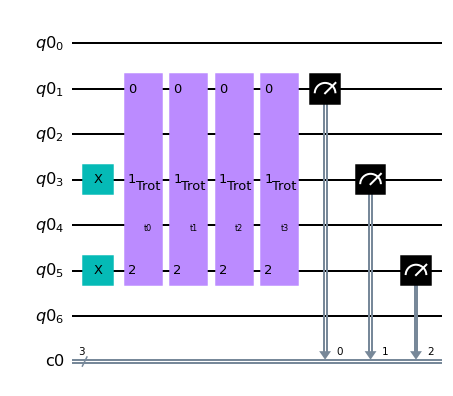

################################################################################

Starting optimization!


Optimizer: SLSQP
eps = 0.1

Iter 1 done!
Loss value: -0.07405
Current parameters: [0.01  1.649 0.674 0.809] (sum to 3.14)

Iter 2 done!
Loss value: -0.13189
Current parameters: [0.043 1.692 0.534 0.872] (sum to 3.14)

Iter 3 done!
Loss value: -0.38948
Current parameters: [0.12  1.714 0.01  1.298] (sum to 3.14)

Iter 4 done!
Loss value: -0.43262
Current parameters: [0.01  1.602 0.01  1.519] (sum to 3.14)

Iter 5 done!
Loss value: -0.43332
Current parameters: [0.01  1.579 0.01  1.543] (sum to 3.14)

Iter 6 done!
Loss value: -0.43361
Current parameters: [0.01  1.56  0.01  1.562] (sum to 3.14)

Iter 7 done!
Loss value: -0.43361
Current parameters: [0.01  1.555 0.01  1.566] (sum to 3.14)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.43361
            Iterations: 7
            Function evaluations: 46
            Gradient evaluations: 7

T

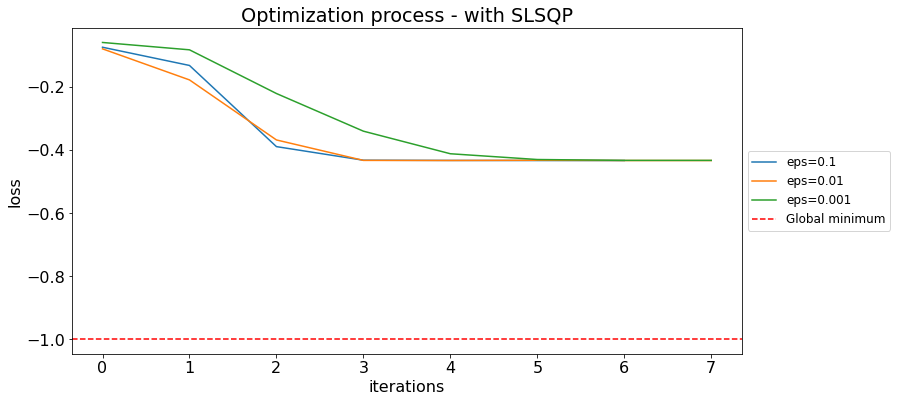


Optimization results:



optimizer    eps                                       final_params  \
0     slsqp  0.100  [0.010000000000000002, 1.5596754147477152, 0.0...   
1     slsqp  0.010  [0.01, 1.5554139711215675, 0.01, 1.56617868246...   
2     slsqp  0.001  [0.034906337404973696, 1.5458424942083155, 0.0...   

   final_loss  
0    -0.43361  
1    -0.43361  
2    -0.43319

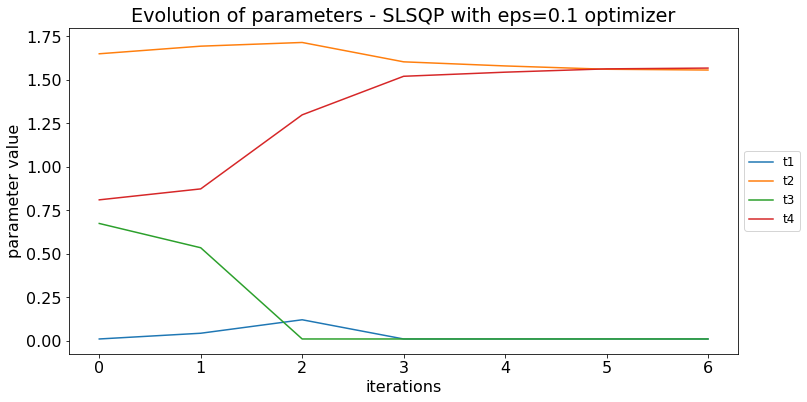

Best parameters (sum to 3.14):	[0.01  1.56  0.01  1.562]
Best parameters (sum to 1):	[0.003 0.496 0.003 0.497]


/home/askery/anaconda3/envs/qiskit/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


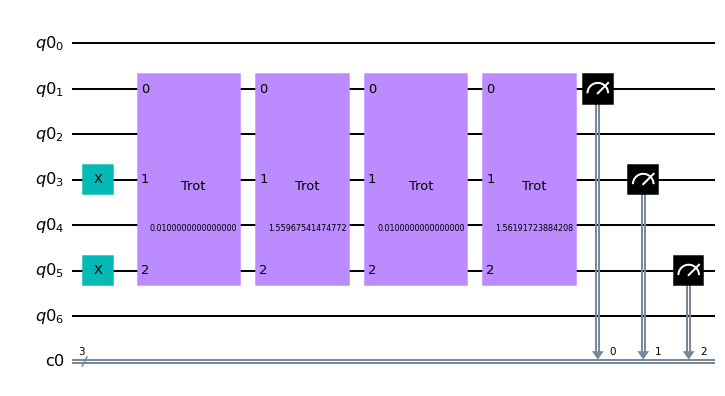

################################################################################
Single trotterization step:


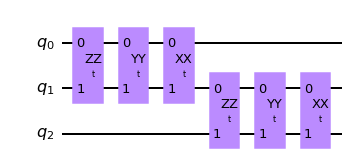

################################################################################

All steps + measurements of state tomography:


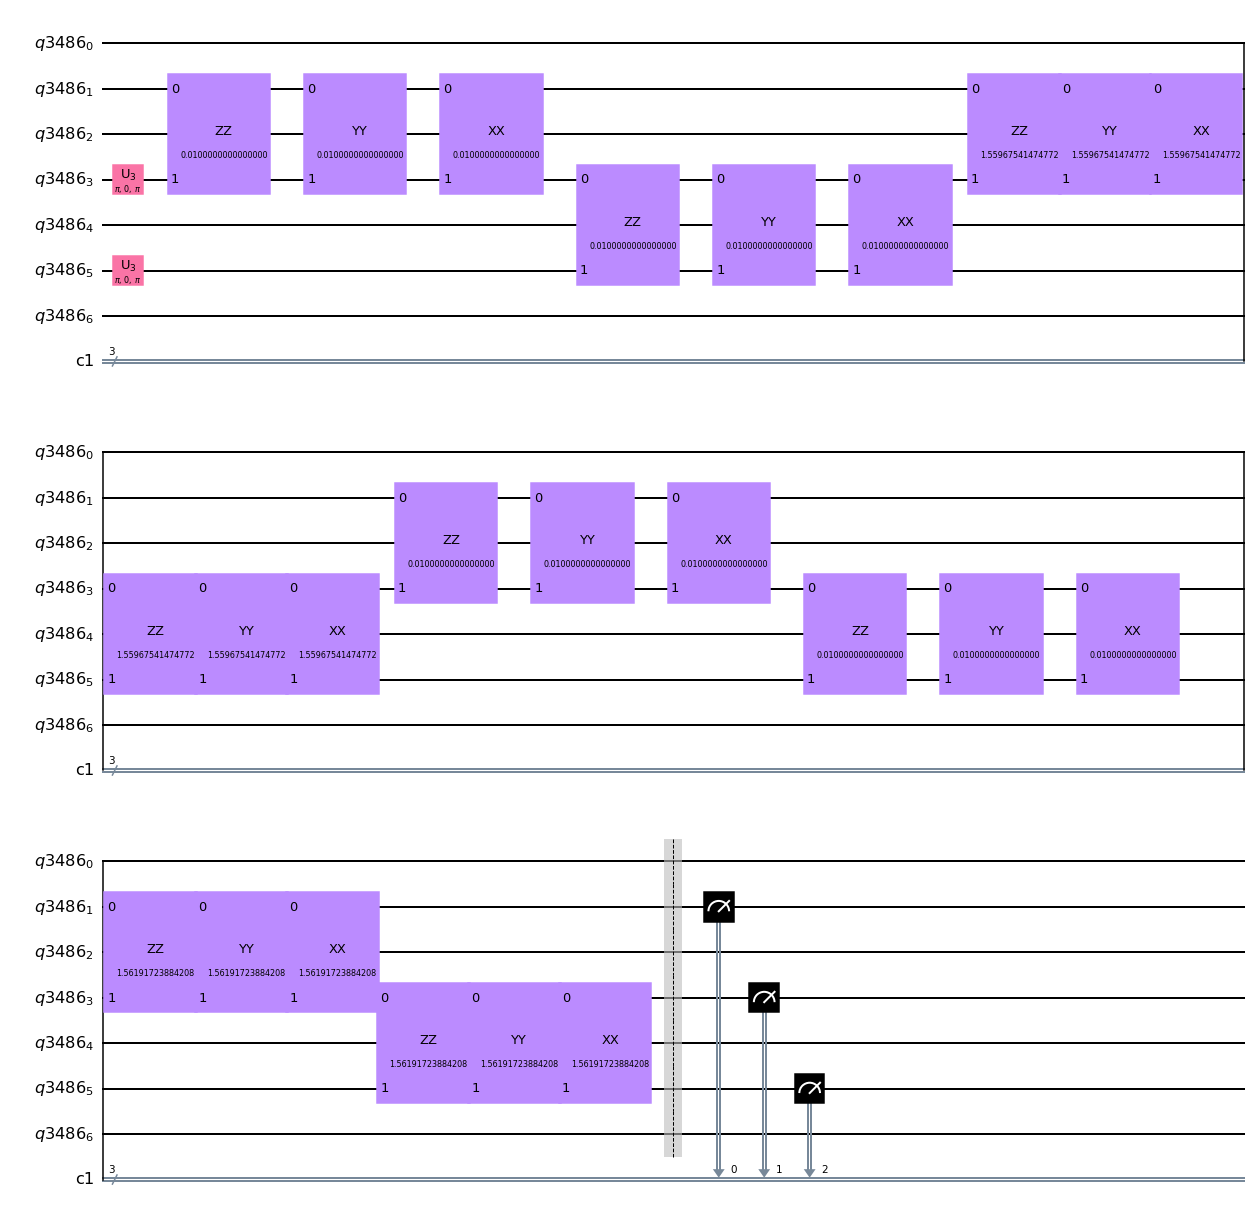

################################################################################

1/8 - Job ID 6249edcee978c730fdfb209e
2/8 - Job ID 6249edd69962254bbb8bb657
3/8 - Job ID 6249eddbf9156f2336cc034d
4/8 - Job ID 6249eddf996225012a8bb658
5/8 - Job ID 6249ede3133bfd15d95ac10a
6/8 - Job ID 6249ede8be9f6036807719b6
7/8 - Job ID 6249edec7130e1a7e35b2e54
8/8 - Job ID 6249edef99622589258bb659


In [ ]:
uniform_times = False
backend_opt, backend_state_tomo = sim_noisy_jakarta, jakarta#sim_noisy_jakarta
quadratic_loss = False

steps = range(STEP, STEP+1)
min_times = [min_t]

combs = itertools.product(steps, min_times)

for trotter_steps, params_bounds_min in combs:
    
    print("\n\n")    
    print("#"*80)
    print("="*80)
    print("#"*80)
    print(f"Order: {order}".center(80))
    print(f"# steps: {trotter_steps}".center(80))
    print(f"min time: {params_bounds_min}".center(80))
    print("#"*80)
    print("="*80)
    print("#"*80)
    print("\n\n")
    
    fids, fidelity_pi, best_params = optimize_params_and_run(order, trotter_steps, uniform_times, params_bounds_min,
                                                             backend_opt, backend_state_tomo, quadratic_loss)
    
    results['order'].append(order)
    results['n_steps'].append(trotter_steps)
    results['t_min'].append(params_bounds_min)
    results['state_tomo_fids'].append(fids)
    results['fid_pi'].append(fidelity_pi)
    results['best_params'].append(best_params)

In [7]:
results_first_order = pd.DataFrame(results).sort_values("fid_pi", ascending=False)
results_first_order

order  n_steps  t_min                                    state_tomo_fids  \
0       1        4   0.00  [0.8370563118956107, 0.8393251415542413, 0.837...   
3       1        5   0.00  [0.8373373112963522, 0.8370059294837345, 0.836...   
12      1        8   0.00  [0.8381172965389843, 0.8396287076049725, 0.840...   
6       1        6   0.00  [0.5847052491624318, 0.583276104869365, 0.5784...   
9       1        7   0.00  [0.5788973440035662, 0.5784540685227475, 0.579...   
2       1        4   0.01  [0.43263026019617806, 0.4327584357990887, 0.43...   
1       1        4   0.10  [0.42437231256046437, 0.42193809043237934, 0.4...   
5       1        5   0.01  [0.38668748711903, 0.3802296544900567, 0.38683...   
4       1        5   0.10  [0.3658799296915141, 0.3633457745808068, 0.364...   
8       1        6   0.01  [0.3437436633659015, 0.3429832999455797, 0.347...   
11      1        7   0.01  [0.3166396224988392, 0.31502541077113067, 0.31...   
7       1        6   0.10  [0.3138798748942154, 0.3097997404569019, 0.313...   
14      1        8   0.01  [0.2910906584860391, 0.29462865232424335, 0.29...   
10      1        7   0.10  [0.2658641230637536, 0.27077144334804015, 0.26...   
13      1        8   0.10  [0.24075670691856543, 0.24451324664062385, 0.2...   

     fid_pi                                        best_params  
0    0.8385  [4.8832032167878126e-14, 3.141592653589793, 0....  
3    0.8385  [0.0, 3.1415926535897696, 3.439485024916977e-1...  
12   0.8385  [7.146221662098296e-16, 0.0, 0.0, 3.3407016745...  
6   0.58056  [0.0, 1.5699155818095072, 1.571677071780389, 0...  
9   0.58056  [2.4699328276004892e-14, 1.5698779253926243, 1...  
2   0.43361  [0.010000000000000002, 1.5596754147477152, 0.0...  
1   0.42638  [0.10000000000000007, 1.4500708024086917, 0.10...  
5   0.38469  [0.010000000000000002, 1.5536108975875518, 1.5...  
4   0.36478  [0.10000000000000005, 1.4251528848662895, 1.41...  
8   0.34654  [0.01, 1.551367659085081, 1.5502249945047128, ...  
11  0.31651  [0.010000000000000012, 1.5462624495102477, 1.5...  
7   0.31234  [0.10000000000000003, 1.3837207430736929, 1.35...  
14  0.29375  [0.010000000000000234, 1.539090053801102, 0.01...  
10  0.26873  [0.10000000000000002, 1.3381511992365756, 1.30...  
13  0.24363  [0.10000000000000012, 1.2383056127695864, 0.10...

___________

## Second order

- Steps: 4 to 8;
- Variable time;
- Minimum time: 0.1 and 0.01;

In [8]:
results = {"order" : [],
           "n_steps" : [],
           "t_min" : [],
           "fid_pi" : [],
           "state_tomo_fids" : [],
           "best_params" : []}




################################################################################
################################################################################
                                    Order: 2                                    
                                   # steps: 4                                   
                                 min time: 0.1                                  
################################################################################
################################################################################





/home/askery/anaconda3/envs/qiskit/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


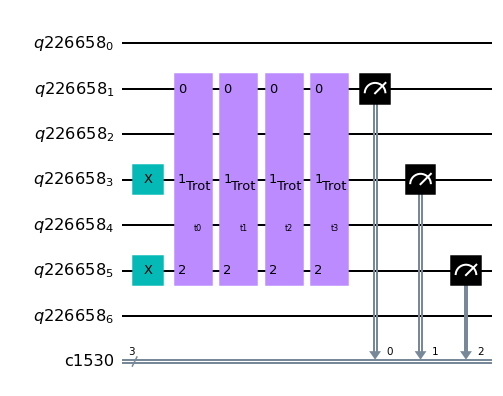

################################################################################

Starting optimization!


Optimizer: SLSQP
eps = 0.1

Iter 1 done!
Loss value: -0.1521
Current parameters: [0.1   1.576 0.887 0.579] (sum to 3.14)

Iter 2 done!
Loss value: -0.15794
Current parameters: [0.1   1.54  0.948 0.553] (sum to 3.14)

Iter 3 done!
Loss value: -0.2097
Current parameters: [0.1   1.345 1.344 0.353] (sum to 3.14)

Iter 4 done!
Loss value: -0.24851
Current parameters: [0.1   1.172 1.769 0.1  ] (sum to 3.14)

Iter 5 done!
Loss value: -0.2549
Current parameters: [0.1   1.217 1.725 0.1  ] (sum to 3.14)

Iter 6 done!
Loss value: -0.18496
Current parameters: [0.1   1.766 0.983 0.292] (sum to 3.14)

Iter 7 done!
Loss value: -0.25869
Current parameters: [0.1   1.711 1.231 0.1  ] (sum to 3.14)

Iter 8 done!
Loss value: -0.28515
Current parameters: [0.1   1.47  1.471 0.1  ] (sum to 3.14)

Iter 9 done!
Loss value: -0.2851
Current parameters: [0.1   1.474 1.468 0.1  ] (sum to 3.14)

Optimization t

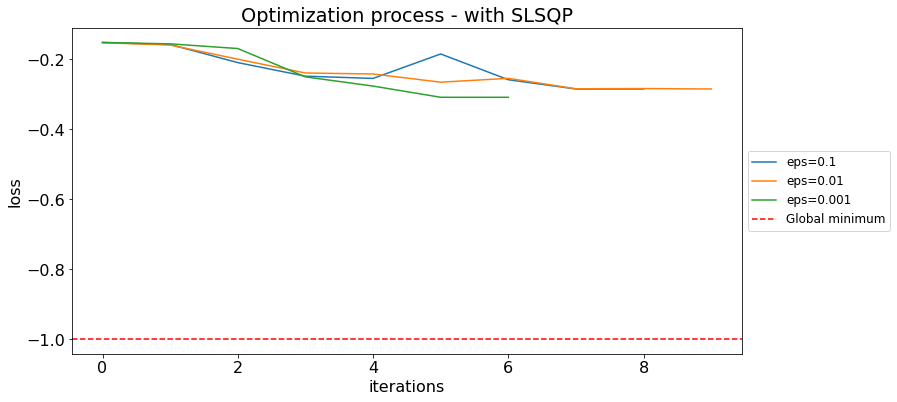


Optimization results:



optimizer    eps                                       final_params  \
2     slsqp  0.001  [0.1, 0.09999999999999998, 2.841592653589761, ...   
0     slsqp  0.100  [0.1, 1.4701577989065229, 1.4714348546832703, ...   
1     slsqp  0.010  [0.10000000000000024, 1.471087331008943, 1.470...   

   final_loss  
2    -0.30885  
0    -0.28515  
1    -0.28513

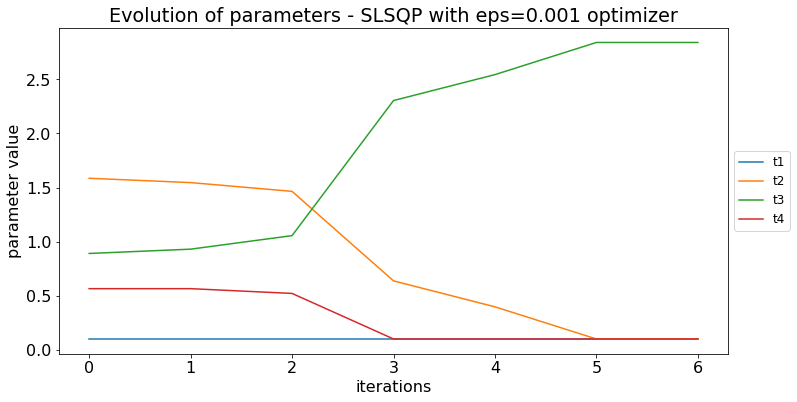

Best parameters (sum to 3.14):	[0.1   0.1   2.842 0.1  ]
Best parameters (sum to 1):	[0.032 0.032 0.905 0.032]


/home/askery/anaconda3/envs/qiskit/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


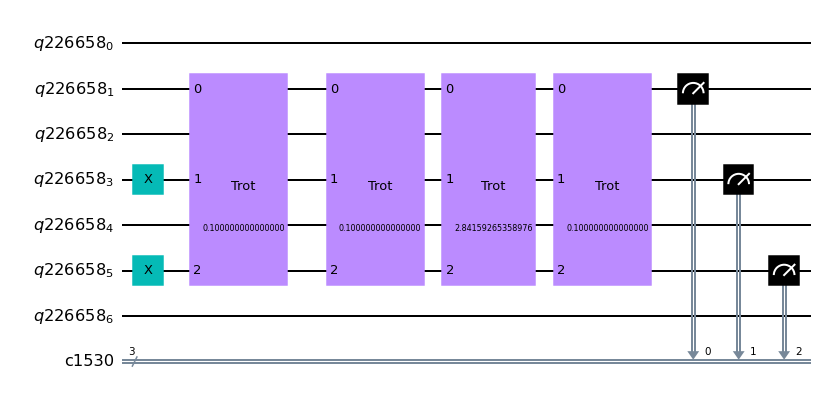

################################################################################
Single trotterization step:


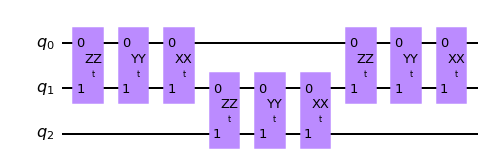

################################################################################

All steps + measurements of state tomography:


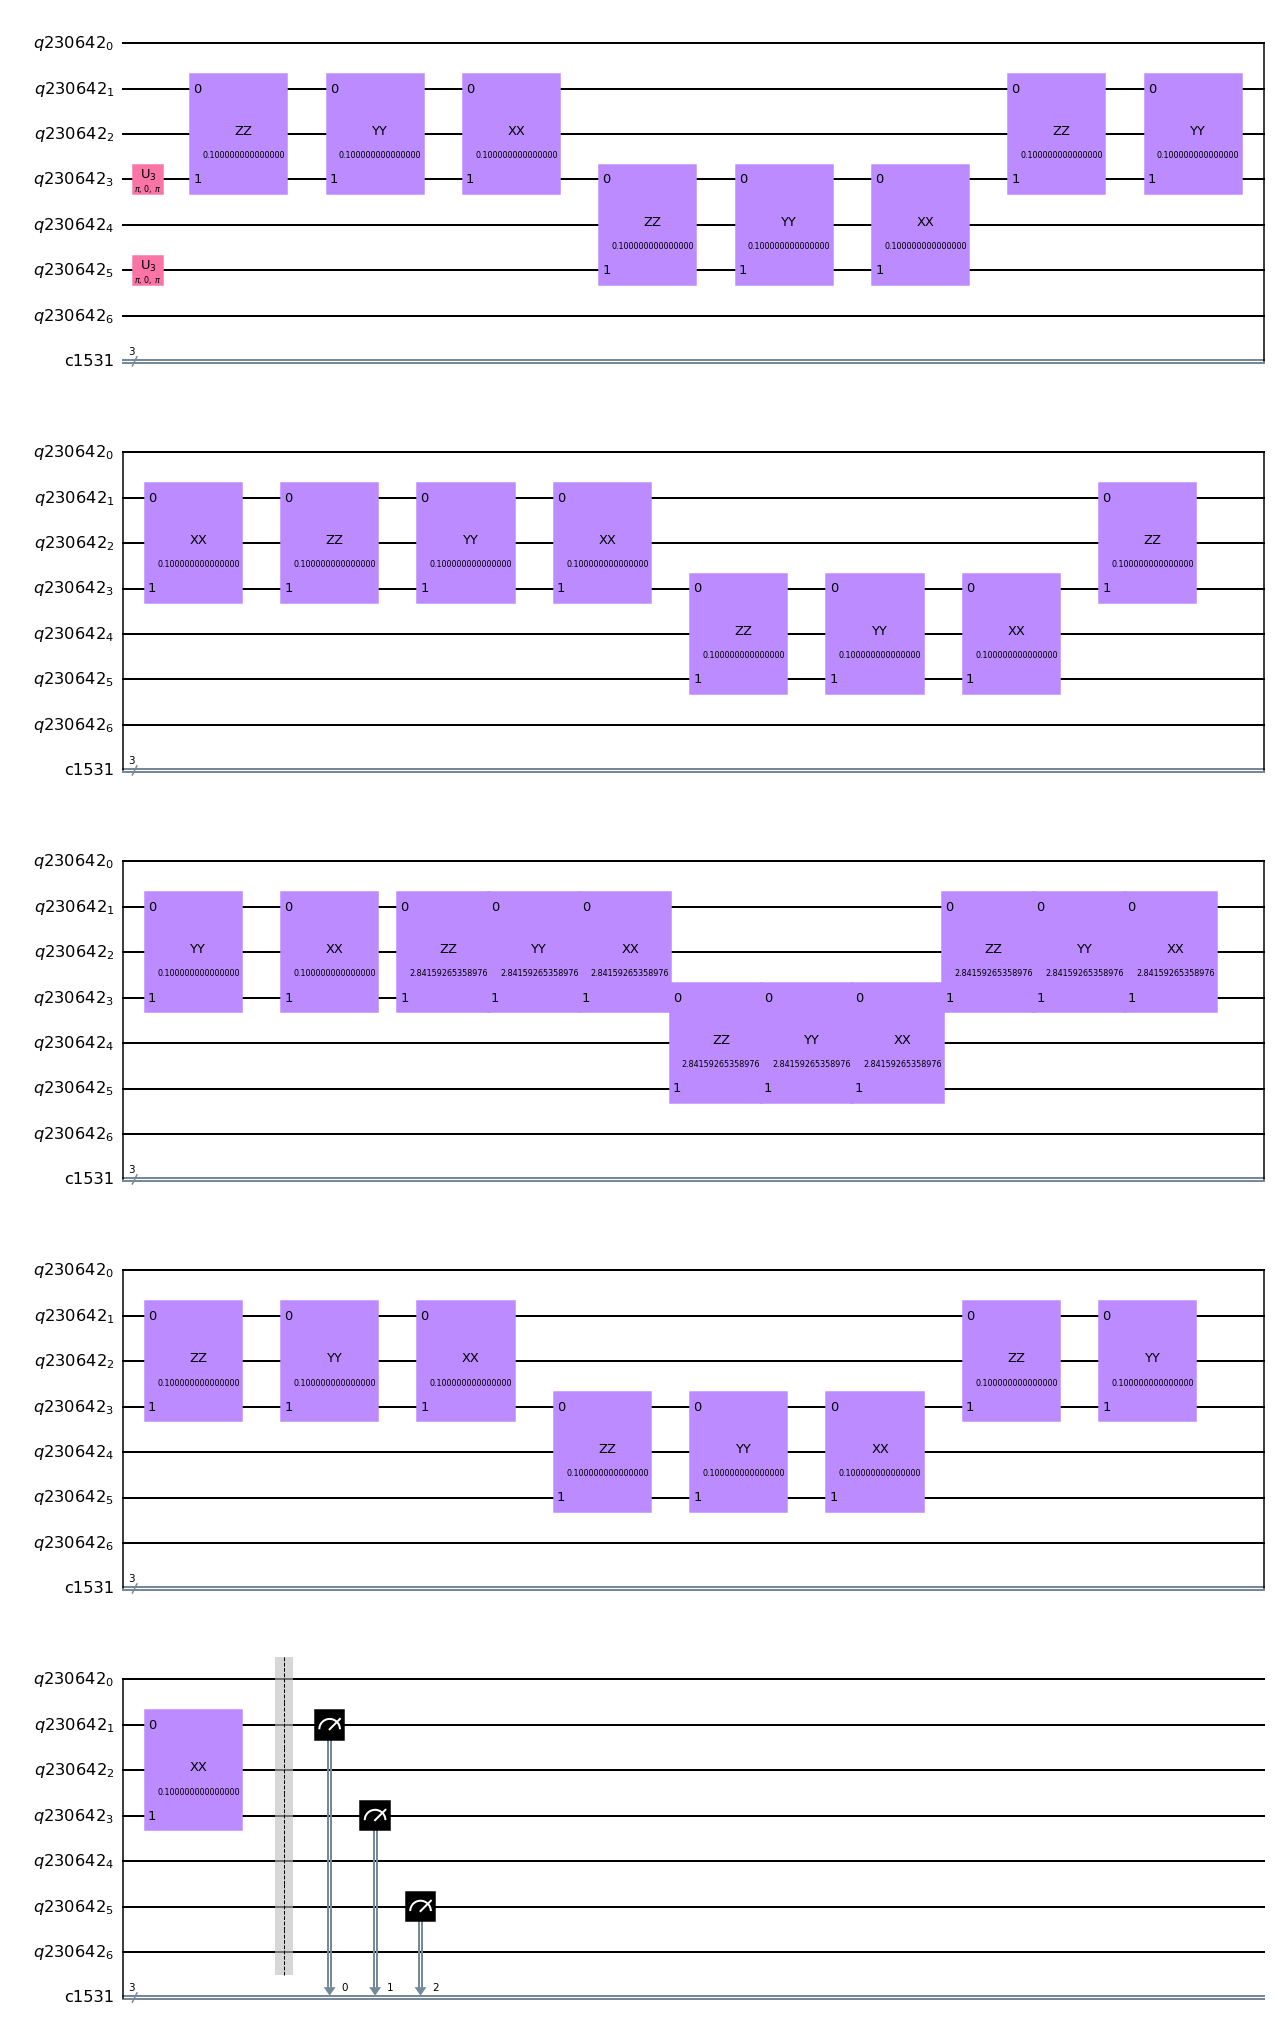

################################################################################

1/8 - Job ID 0d89f074-9237-42cf-8910-e5f69a8cde68
2/8 - Job ID 6bd60c08-b1ab-40cd-bd20-041bea8dd7b0
3/8 - Job ID 3e865db5-9458-4b59-88dd-aa27005d2f5e
4/8 - Job ID d554aa53-6a10-442e-bd4c-4d877c5fd4ee
5/8 - Job ID 35ebf417-3395-49ba-b4b4-6a769b31ef82
6/8 - Job ID d343278e-732c-45a5-9b15-35065abf0094
7/8 - Job ID f0b8a123-d6e9-4b59-91e6-be77082fcc92
8/8 - Job ID 577d884e-9540-4980-bde4-bb4ce253a844

################################################################################

Final results - order: 2 - strotter steps: 4

State tomography fidelity = 0.3082 ± 0.0033

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:00:55



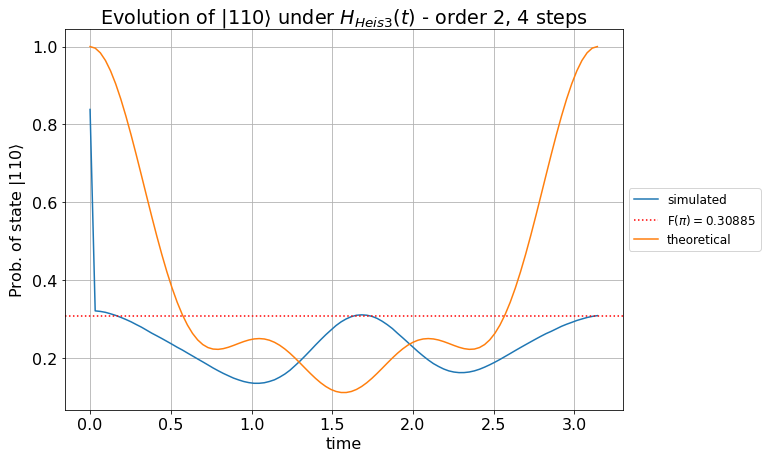




################################################################################
################################################################################
                                    Order: 2                                    
                                   # steps: 4                                   
                                 min time: 0.01                                 
################################################################################
################################################################################





/home/askery/anaconda3/envs/qiskit/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


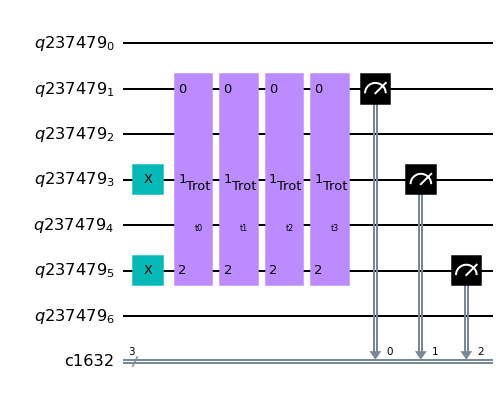

################################################################################

Starting optimization!


Optimizer: SLSQP
eps = 0.1

Iter 1 done!
Loss value: -0.16575
Current parameters: [0.01  1.642 0.927 0.563] (sum to 3.14)

Iter 2 done!
Loss value: -0.17408
Current parameters: [0.01  1.624 0.994 0.513] (sum to 3.14)

Iter 3 done!
Loss value: -0.3002
Current parameters: [0.01  1.549 1.462 0.121] (sum to 3.14)

Iter 4 done!
Loss value: -0.31354
Current parameters: [0.01  1.516 1.606 0.01 ] (sum to 3.14)

Iter 5 done!
Loss value: -0.31269
Current parameters: [0.012 1.548 1.539 0.043] (sum to 3.14)

Iter 6 done!
Loss value: -0.31293
Current parameters: [0.016 1.54  1.55  0.035] (sum to 3.14)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.31382
            Iterations: 6
            Function evaluations: 42
            Gradient evaluations: 6

Total time of optimization: 00:00:24

Optimizer: SLSQP
eps = 0.01

Iter 1 done!
Loss value: -0.16

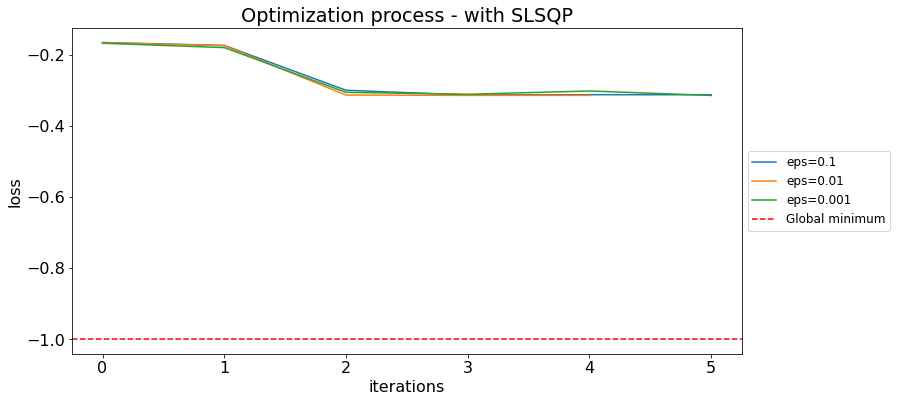


Optimization results:



optimizer    eps                                       final_params  \
2     slsqp  0.001  [0.010000000000000007, 1.5603501684830143, 1.5...   
1     slsqp  0.010  [0.01, 1.5733728240283402, 1.548219829561453, ...   
0     slsqp  0.100  [0.010759503317033148, 1.5292701342050166, 1.5...   

   final_loss  
2    -0.31477  
1    -0.31466  
0    -0.31382

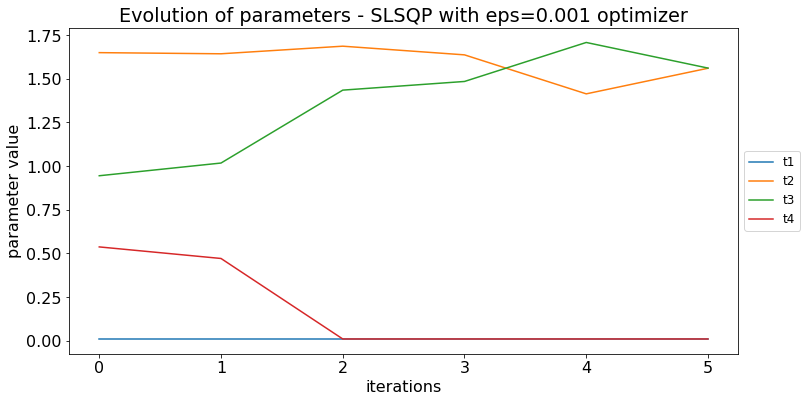

Best parameters (sum to 3.14):	[0.01  1.56  1.561 0.01 ]
Best parameters (sum to 1):	[0.003 0.497 0.497 0.003]


/home/askery/anaconda3/envs/qiskit/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


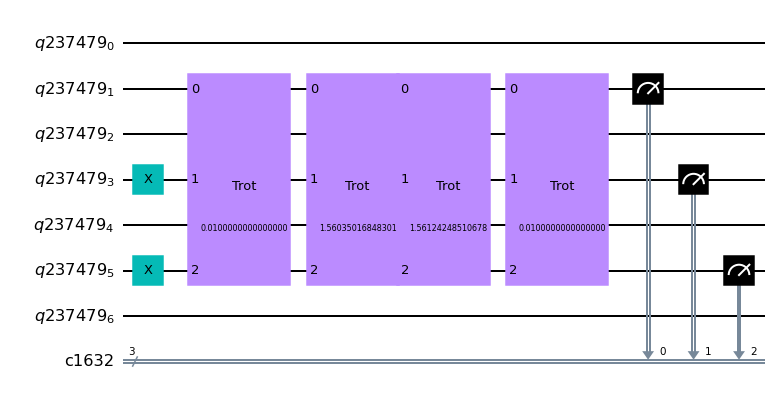

################################################################################
Single trotterization step:


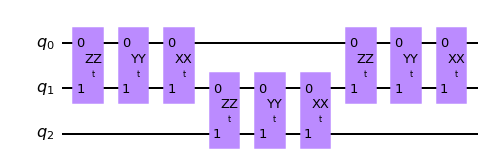

################################################################################

All steps + measurements of state tomography:


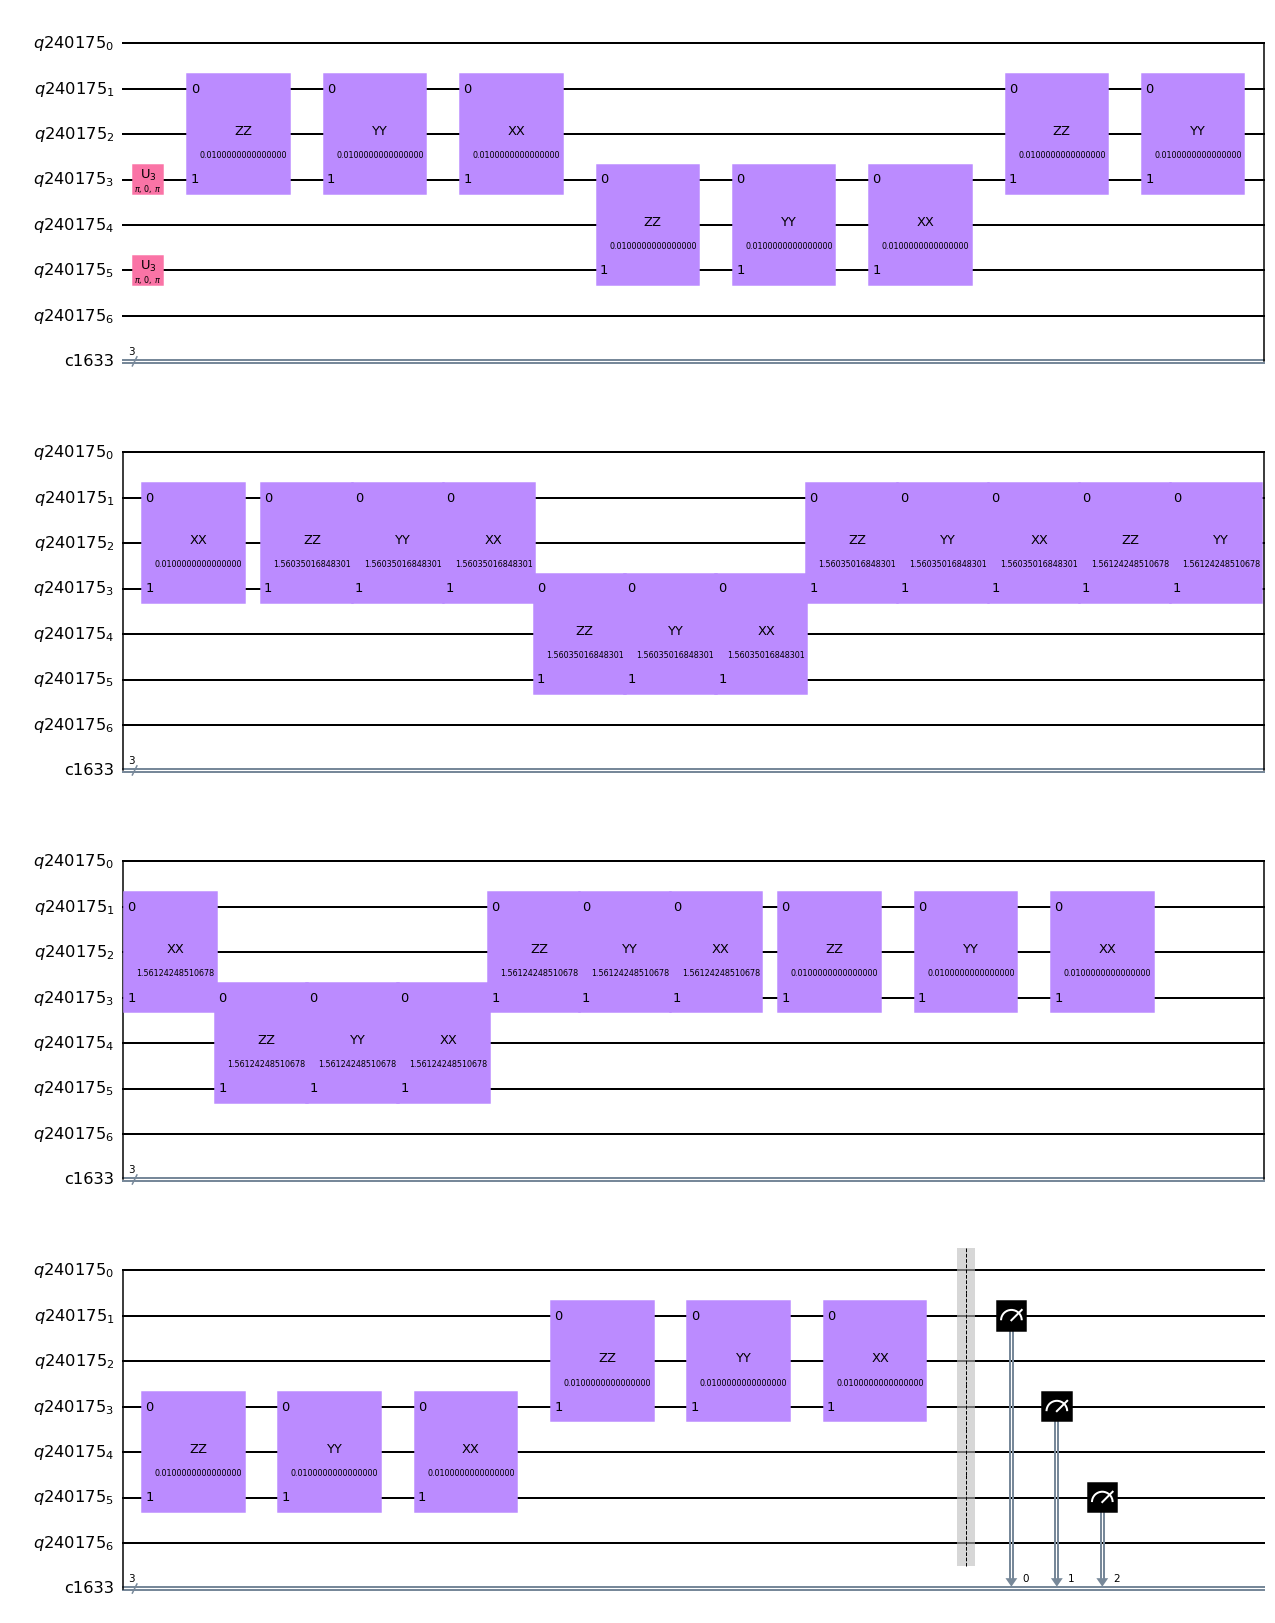

################################################################################

1/8 - Job ID 60a3807e-b243-4392-8a9e-f0ca7e384b6a
2/8 - Job ID 5220e06b-8fe4-4dd7-942a-03071151e8a5
3/8 - Job ID 365cc965-9b1f-471c-a50f-8cdad29c664c
4/8 - Job ID abe82638-dd09-41c9-b944-cb2305c6813f
5/8 - Job ID 5a7a032d-13ad-4d49-8618-a0d1b828bcc4
6/8 - Job ID ee39a648-5741-4c83-8bb5-376d9f655fcd
7/8 - Job ID 748743d0-40c0-4849-b877-95e99171ffab
8/8 - Job ID c92c953a-7ceb-49b1-933d-73e2c26385c9

################################################################################

Final results - order: 2 - strotter steps: 4

State tomography fidelity = 0.3152 ± 0.0016

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:01:01



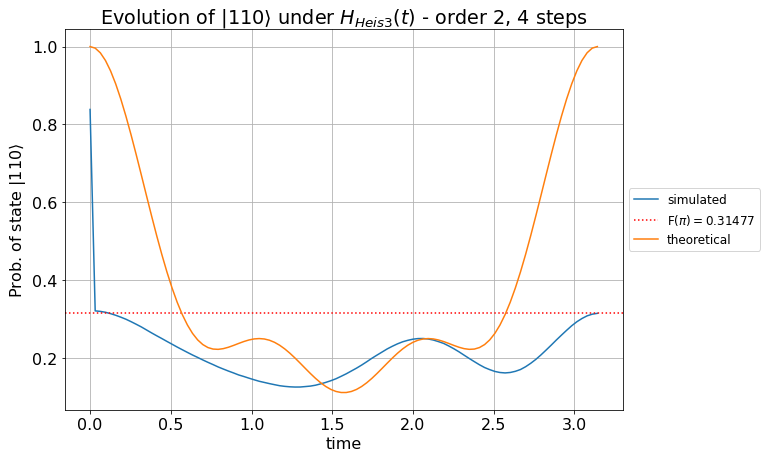




################################################################################
################################################################################
                                    Order: 2                                    
                                   # steps: 5                                   
                                 min time: 0.1                                  
################################################################################
################################################################################





/home/askery/anaconda3/envs/qiskit/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


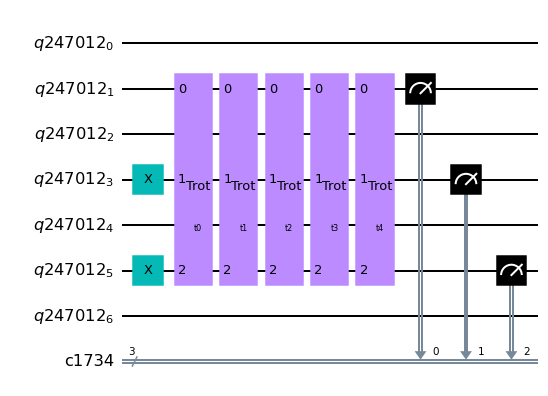

################################################################################

Starting optimization!


Optimizer: SLSQP
eps = 0.1

Iter 1 done!
Loss value: -0.14515
Current parameters: [0.1   1.591 0.858 0.492 0.1  ] (sum to 3.14)

Iter 2 done!
Loss value: -0.14639
Current parameters: [0.1   1.572 0.885 0.485 0.1  ] (sum to 3.14)

Iter 3 done!
Loss value: -0.15696
Current parameters: [0.1   1.474 1.041 0.427 0.1  ] (sum to 3.14)

Iter 4 done!
Loss value: -0.18798
Current parameters: [0.1   0.973 1.869 0.1   0.1  ] (sum to 3.14)

Iter 5 done!
Loss value: -0.18944
Current parameters: [0.1   1.009 1.833 0.1   0.1  ] (sum to 3.14)

Iter 6 done!
Loss value: -0.22134
Current parameters: [0.1   1.275 1.566 0.1   0.1  ] (sum to 3.14)

Iter 7 done!
Loss value: -0.25596
Current parameters: [0.102 2.672 0.1   0.167 0.1  ] (sum to 3.14)

Iter 8 done!
Loss value: -0.26505
Current parameters: [0.1   2.742 0.1   0.1   0.1  ] (sum to 3.14)

Iter 9 done!
Loss value: -0.26505
Current parameters: [0.

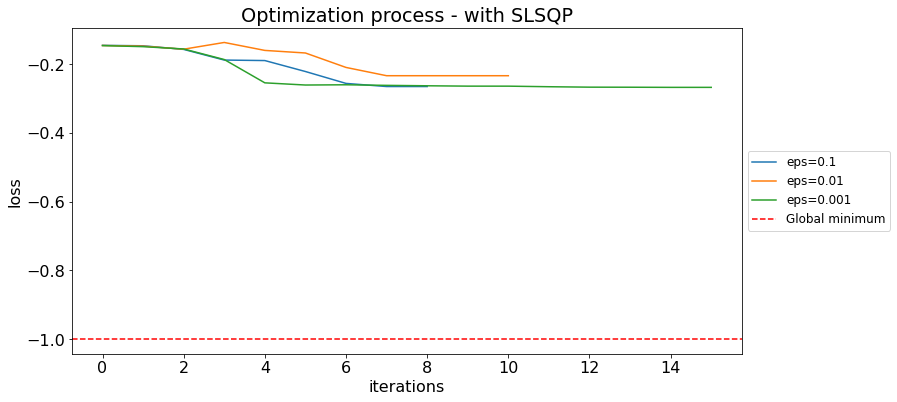


Optimization results:



optimizer    eps                                       final_params  \
2     slsqp  0.001  [0.10000000000000057, 0.10000000000000041, 2.7...   
0     slsqp  0.100  [0.1, 2.741592653589793, 0.10000000000000003, ...   
1     slsqp  0.010  [0.1, 1.4375739234412537, 1.404018730148539, 0...   

   final_loss  
2    -0.26746  
0    -0.26505  
1    -0.23357

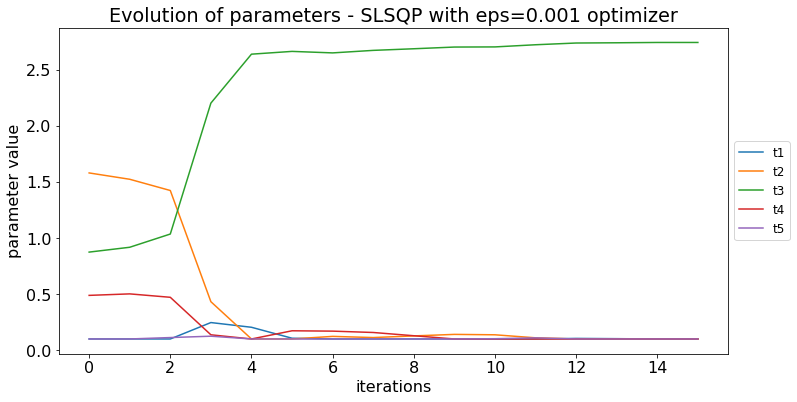

Best parameters (sum to 3.14):	[0.1   0.1   2.742 0.1   0.1  ]
Best parameters (sum to 1):	[0.032 0.032 0.873 0.032 0.032]


/home/askery/anaconda3/envs/qiskit/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


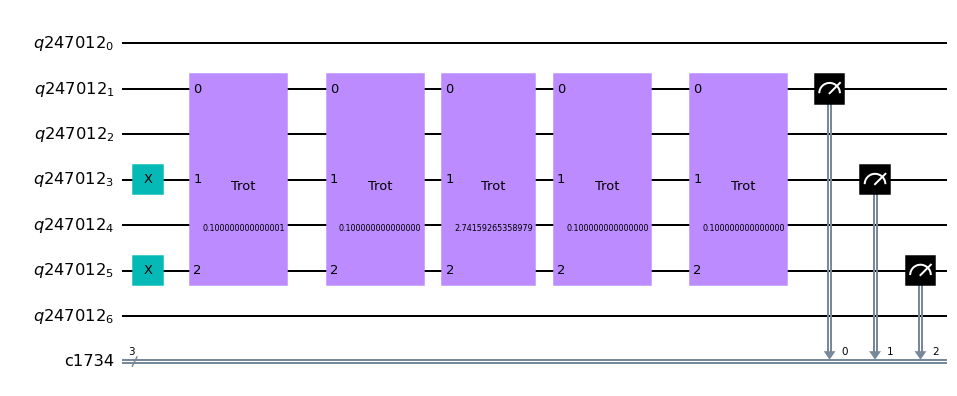

################################################################################
Single trotterization step:


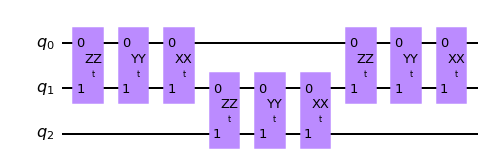

################################################################################

All steps + measurements of state tomography:


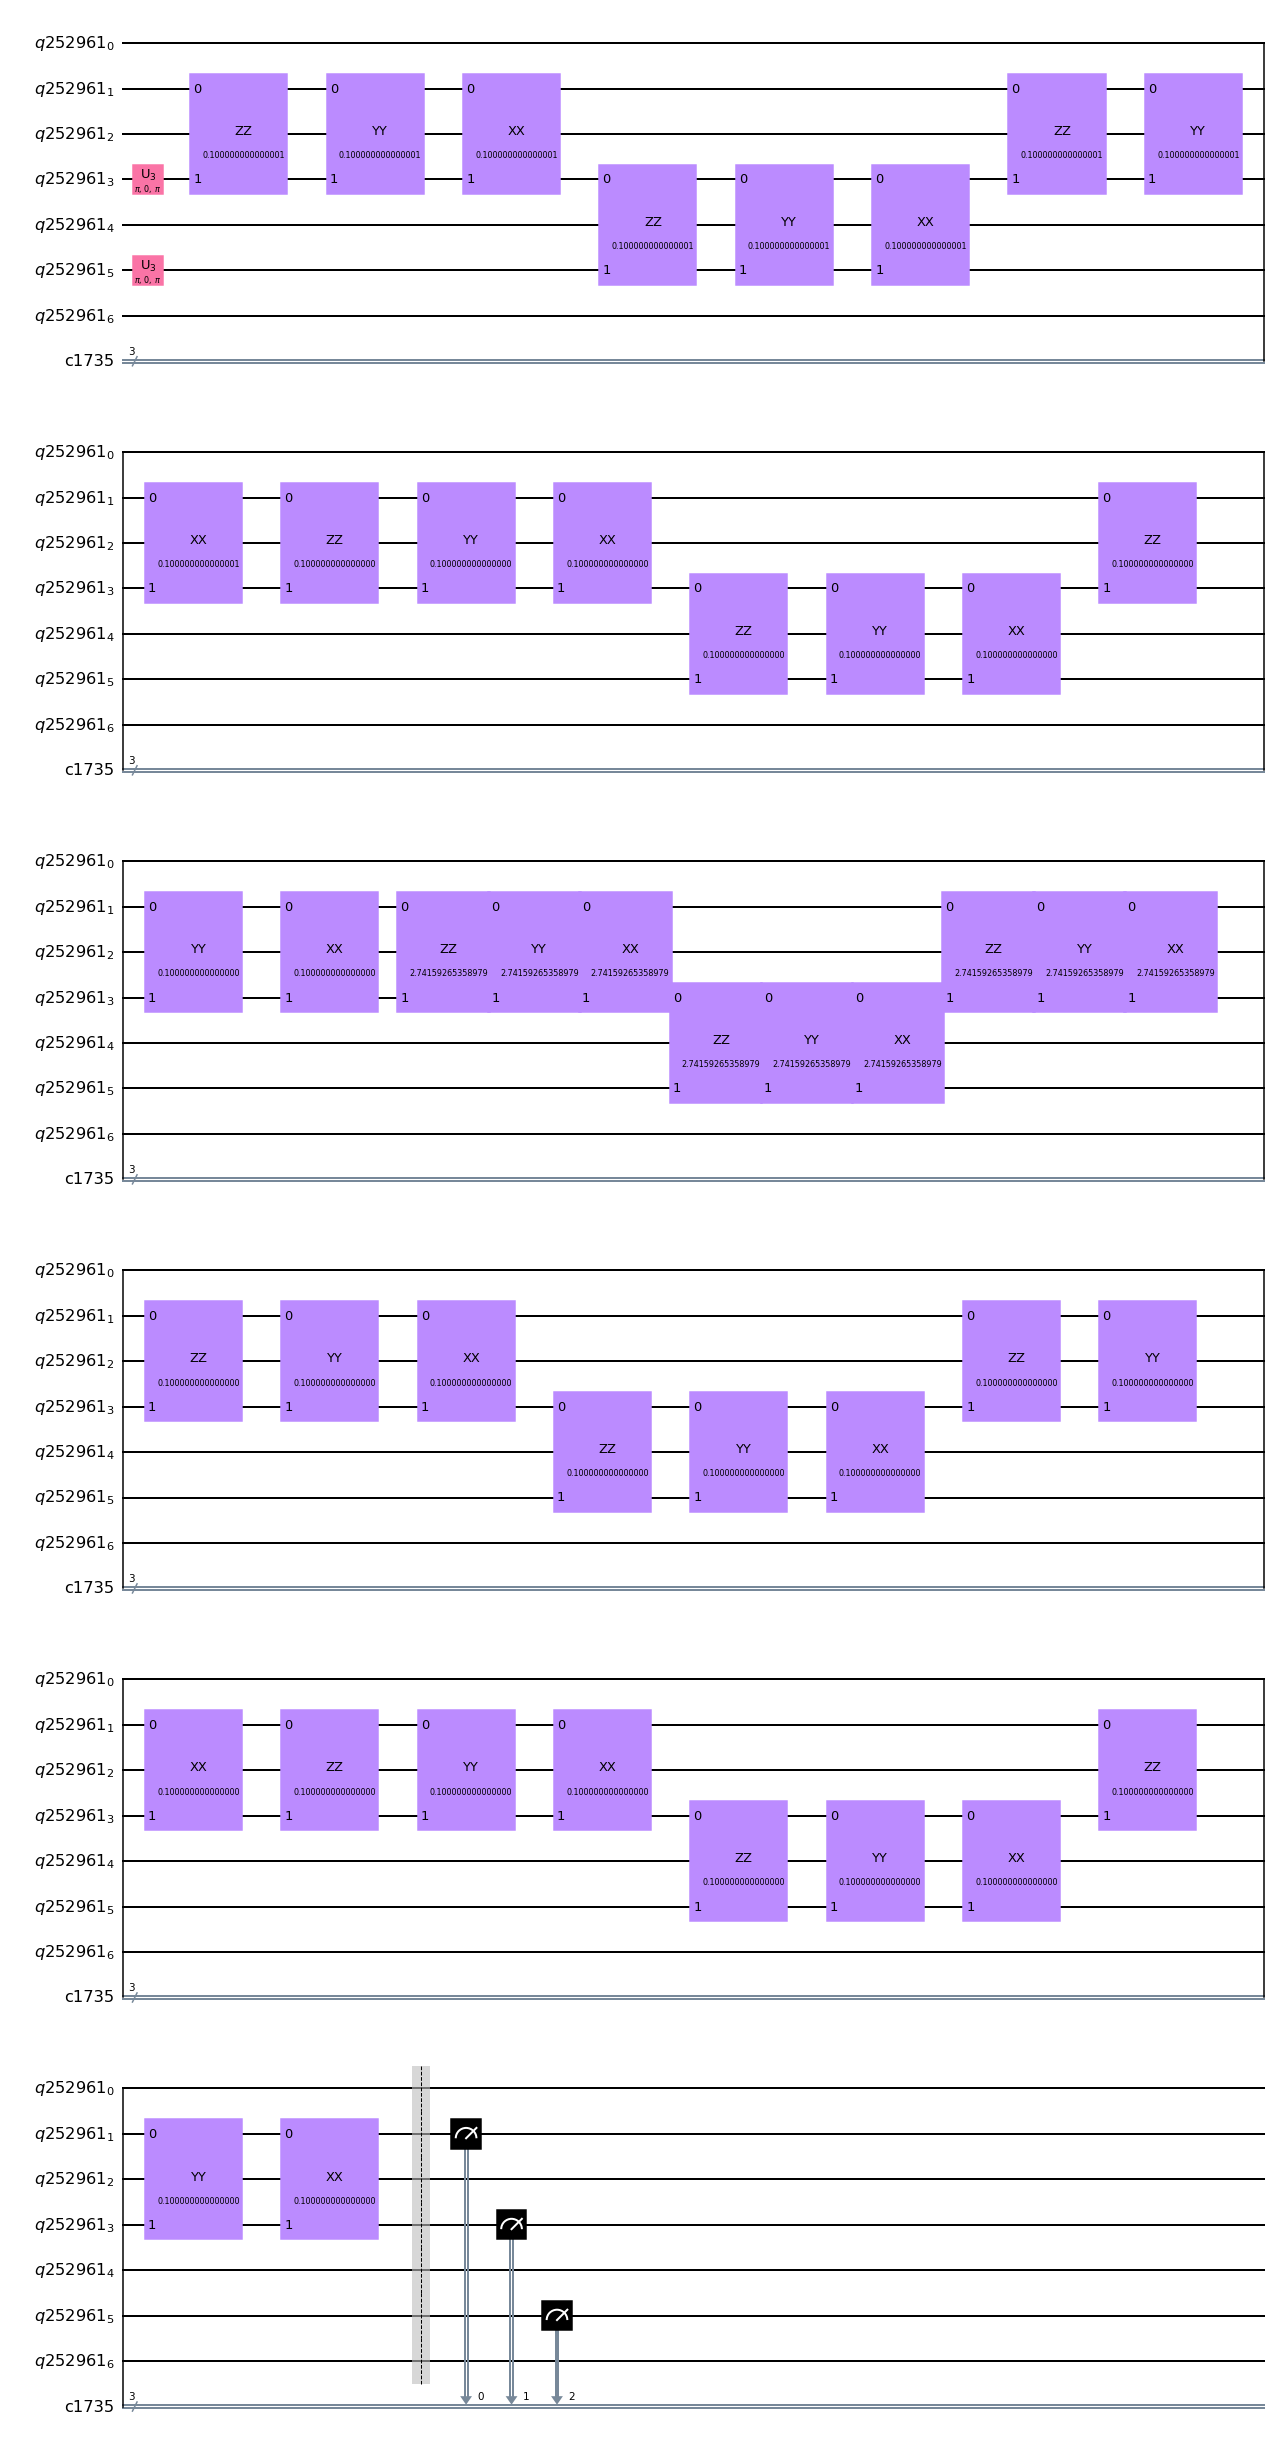

################################################################################

1/8 - Job ID 69a0fd2e-dea8-453c-ab90-eb680cfb17d6
2/8 - Job ID c8894a46-4a6a-4464-9902-61b31580f18c
3/8 - Job ID 764f515e-8568-44d5-a41b-e753f51e542d
4/8 - Job ID 32b34f72-cd28-4230-8c21-0ae4d2dd1276
5/8 - Job ID 5e231a03-c1ad-4740-9e54-3faa194a2a96
6/8 - Job ID fbbe79cb-2033-479b-8e7f-c83abff0d4db
7/8 - Job ID 501c752c-b76b-4e8d-b5bf-4fe2d3b62422
8/8 - Job ID c7a43736-cc8a-419e-b556-9fea4fe2bf4f

################################################################################

Final results - order: 2 - strotter steps: 5

State tomography fidelity = 0.2666 ± 0.0019

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:01:04



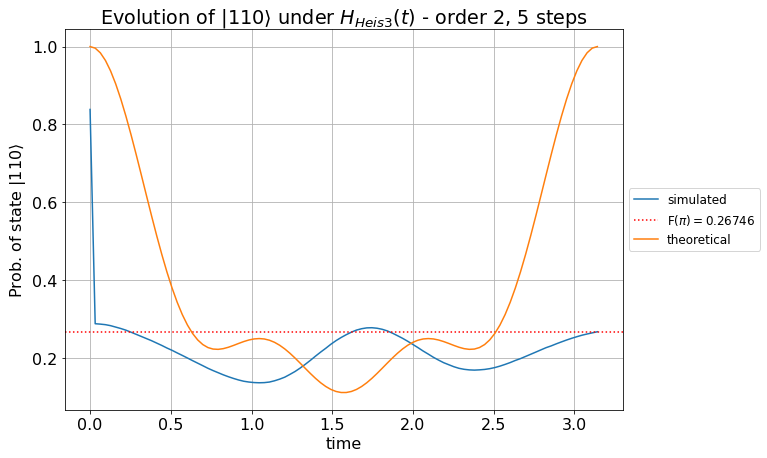




################################################################################
################################################################################
                                    Order: 2                                    
                                   # steps: 5                                   
                                 min time: 0.01                                 
################################################################################
################################################################################





/home/askery/anaconda3/envs/qiskit/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


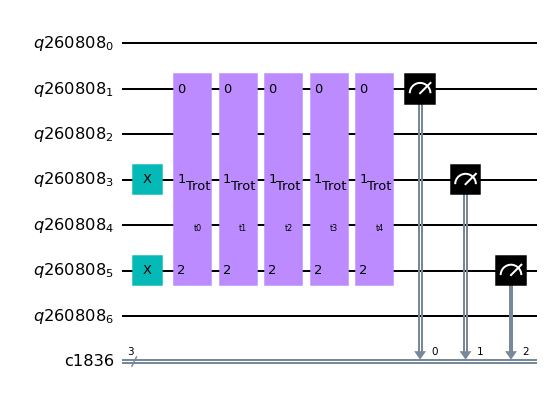

################################################################################

Starting optimization!


Optimizer: SLSQP
eps = 0.1

Iter 1 done!
Loss value: -0.15689
Current parameters: [0.01  1.644 0.918 0.559 0.01 ] (sum to 3.14)

Iter 2 done!
Loss value: -0.1597
Current parameters: [0.01  1.638 0.959 0.524 0.01 ] (sum to 3.14)

Iter 3 done!
Loss value: -0.22043
Current parameters: [0.01  1.617 1.233 0.272 0.01 ] (sum to 3.14)

Iter 4 done!
Loss value: -0.28298
Current parameters: [0.01  1.527 1.585 0.01  0.01 ] (sum to 3.14)

Iter 5 done!
Loss value: -0.28194
Current parameters: [0.013 1.555 1.532 0.032 0.01 ] (sum to 3.14)

Iter 6 done!
Loss value: -0.28249
Current parameters: [0.017 1.55  1.544 0.019 0.012] (sum to 3.14)

Iter 7 done!
Loss value: -0.28227
Current parameters: [0.021 1.542 1.548 0.013 0.017] (sum to 3.14)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.28302
            Iterations: 7
            Function evaluations: 

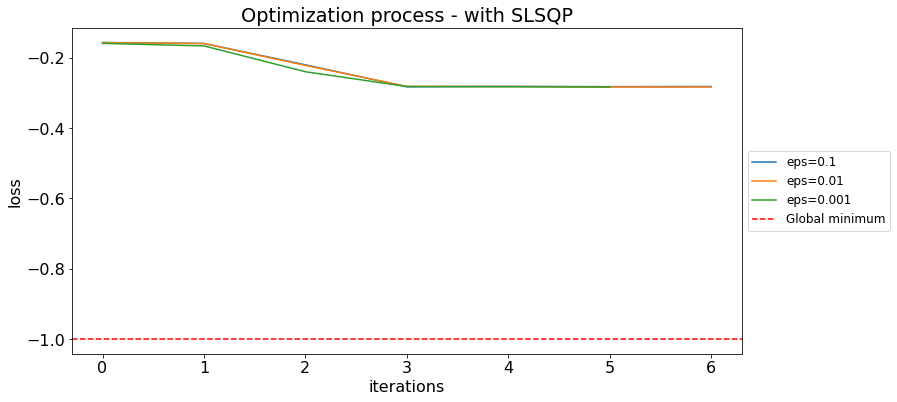


Optimization results:



optimizer    eps                                       final_params  \
1     slsqp  0.010  [0.01, 1.5568394912057102, 1.5547531623840827,...   
2     slsqp  0.001  [0.010000000000000085, 1.556264664688897, 1.55...   
0     slsqp  0.100  [0.011418869470085755, 1.5324718744491768, 1.5...   

   final_loss  
1    -0.28360  
2    -0.28360  
0    -0.28302

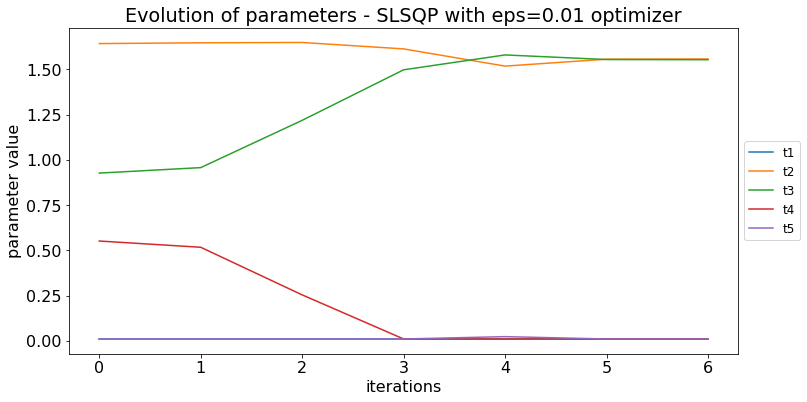

Best parameters (sum to 3.14):	[0.01  1.557 1.555 0.01  0.01 ]
Best parameters (sum to 1):	[0.003 0.496 0.495 0.003 0.003]


/home/askery/anaconda3/envs/qiskit/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


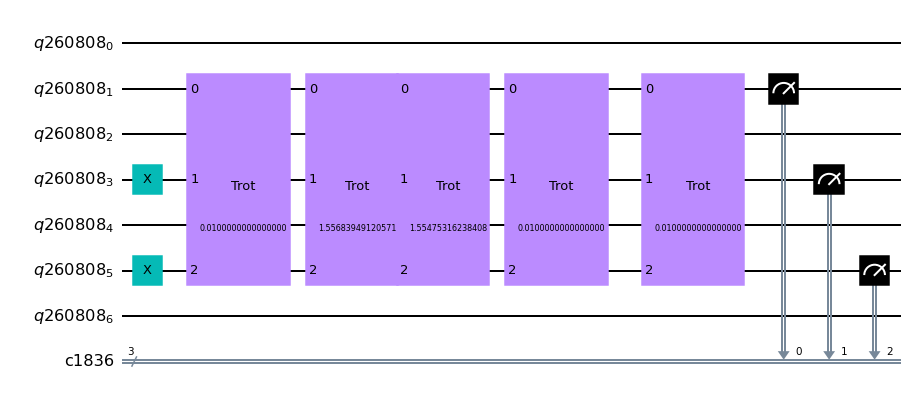

################################################################################
Single trotterization step:


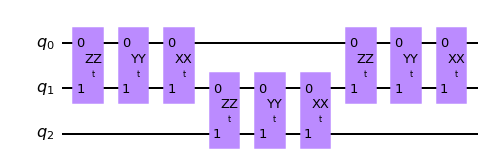

################################################################################

All steps + measurements of state tomography:


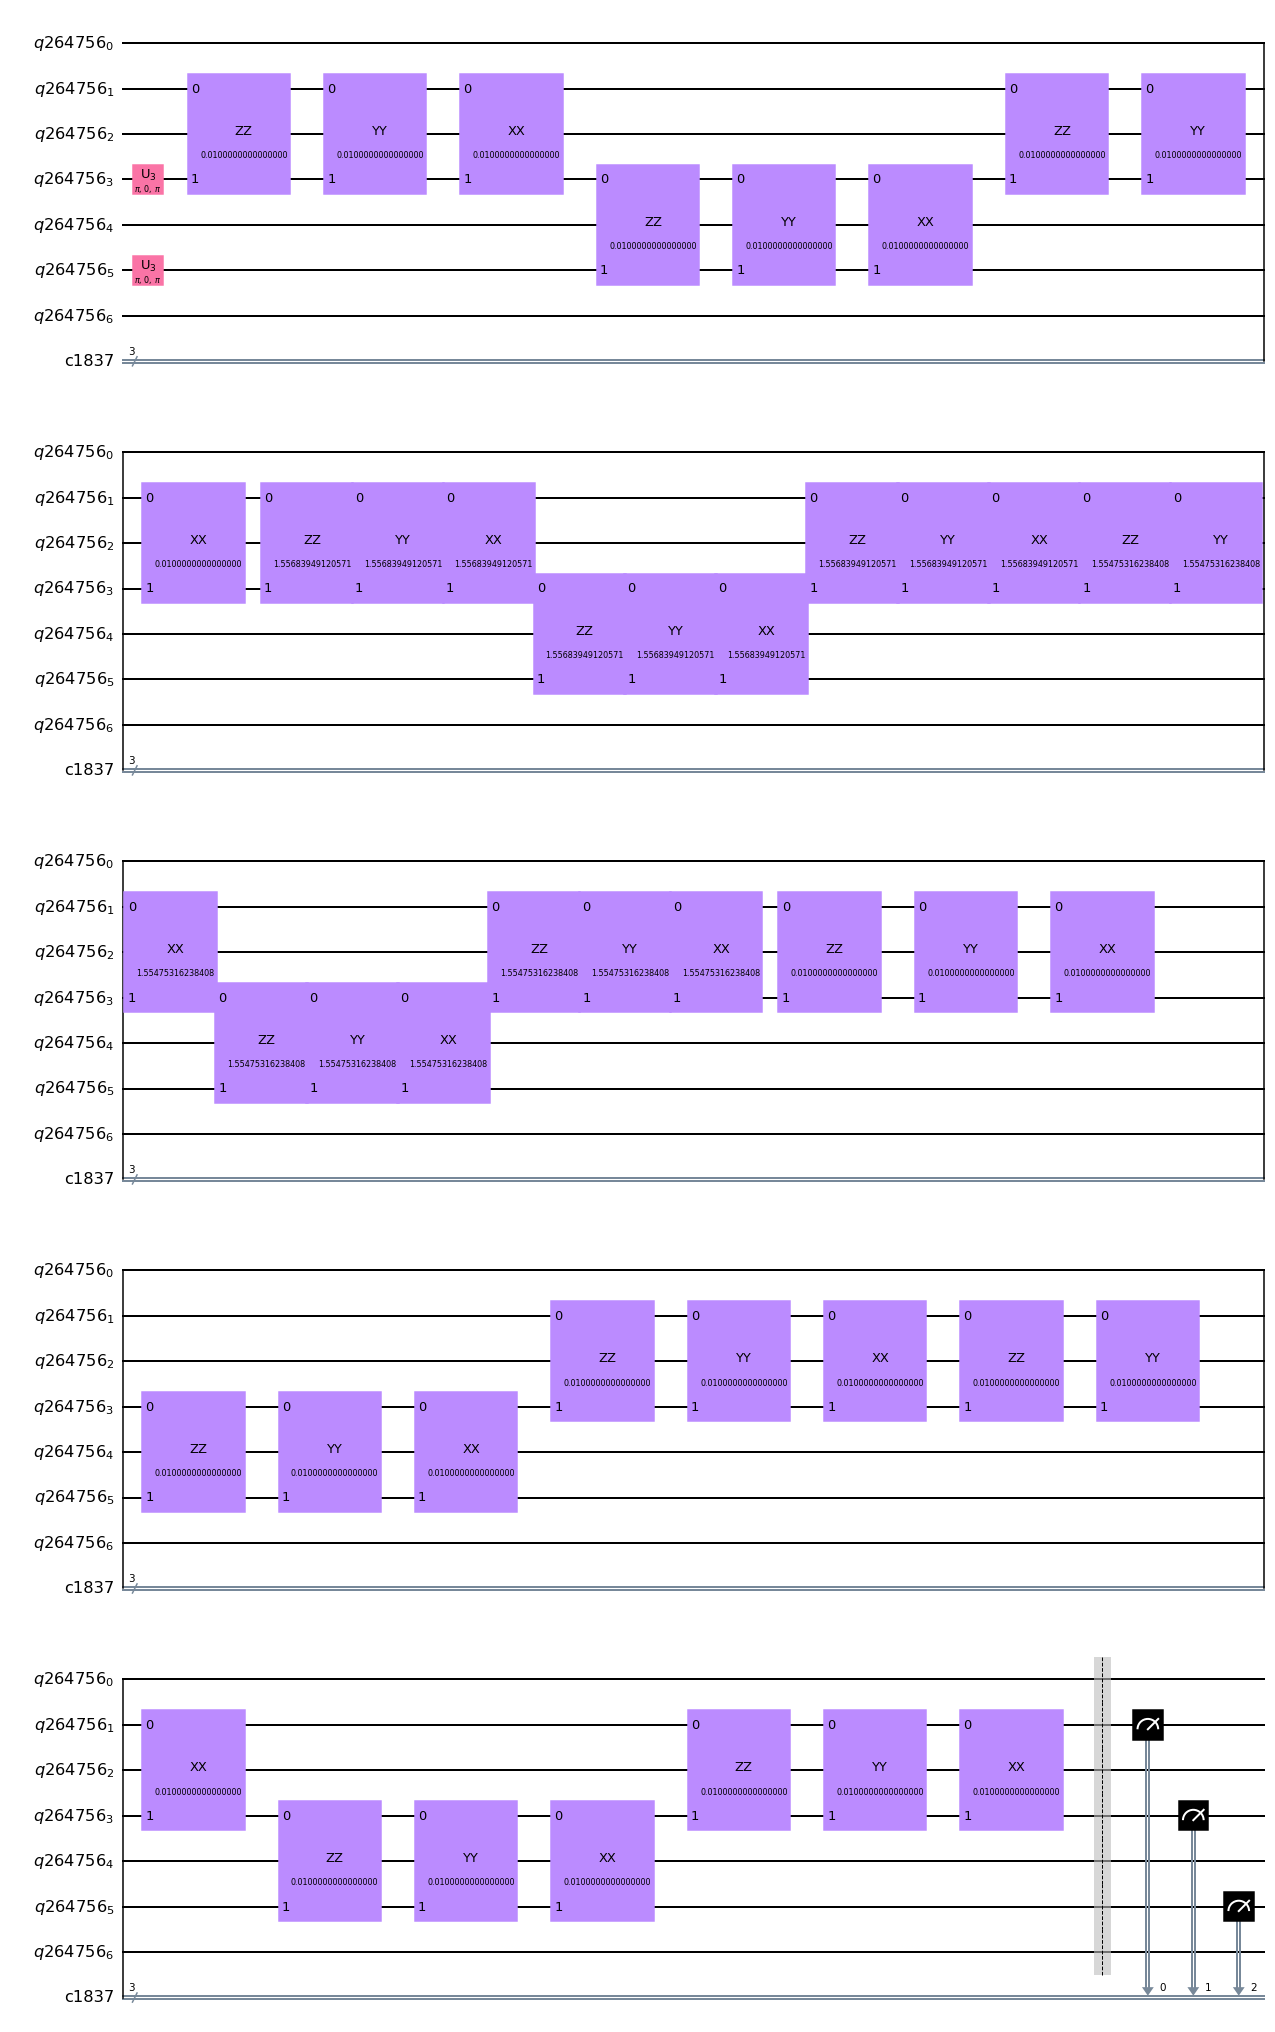

################################################################################

1/8 - Job ID e8a6635b-2082-4dfc-8b64-0e4ce58ee320
2/8 - Job ID 00aa643d-bc58-4fd7-af3b-d838ba9af389
3/8 - Job ID bfece7f9-4b15-46d9-a14c-0afad62759ef
4/8 - Job ID 49c0b667-b20a-4c16-bfbe-5bc79169e75f
5/8 - Job ID d74e0536-fb92-46ba-94fd-c24b594a29a2
6/8 - Job ID 178b5cab-067f-48c2-b160-f85688e5d221
7/8 - Job ID b4945d88-1115-4ce8-b75d-7f14ff8fea24
8/8 - Job ID ab0b20e5-3d04-41da-900c-b7cc0311d5c5

################################################################################

Final results - order: 2 - strotter steps: 5

State tomography fidelity = 0.2825 ± 0.0023

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:01:01



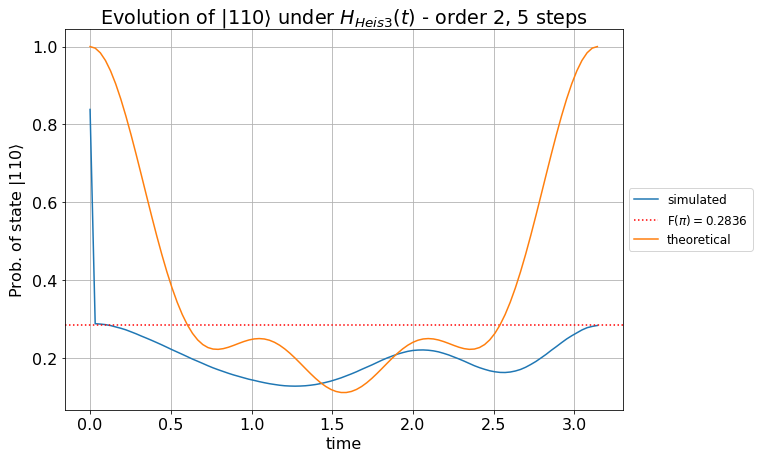




################################################################################
################################################################################
                                    Order: 2                                    
                                   # steps: 6                                   
                                 min time: 0.1                                  
################################################################################
################################################################################





/home/askery/anaconda3/envs/qiskit/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


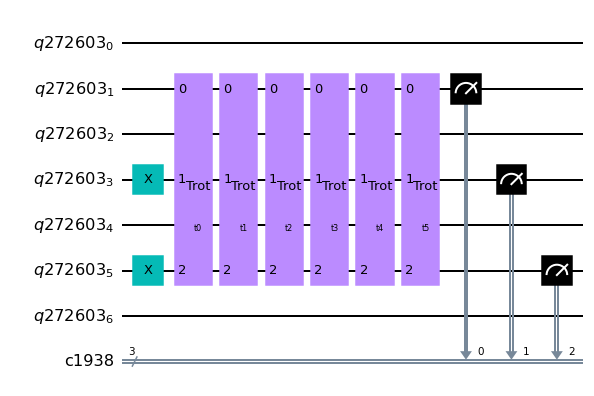

################################################################################

Starting optimization!


Optimizer: SLSQP
eps = 0.1

Iter 1 done!
Loss value: -0.14166
Current parameters: [0.1   1.541 0.869 0.431 0.1   0.1  ] (sum to 3.14)

Iter 2 done!
Loss value: -0.14236
Current parameters: [0.1   1.526 0.889 0.426 0.1   0.1  ] (sum to 3.14)

Iter 3 done!
Loss value: -0.14803
Current parameters: [0.1   1.44  1.015 0.386 0.1   0.1  ] (sum to 3.14)

Iter 4 done!
Loss value: -0.15712
Current parameters: [0.1   0.95  1.792 0.1   0.1   0.1  ] (sum to 3.14)

Iter 5 done!
Loss value: -0.15816
Current parameters: [0.1   0.984 1.758 0.1   0.1   0.1  ] (sum to 3.14)

Iter 6 done!
Loss value: -0.19155
Current parameters: [0.114 2.361 0.1   0.367 0.1   0.1  ] (sum to 3.14)

Iter 7 done!
Loss value: -0.19338
Current parameters: [0.127 2.367 0.1   0.348 0.1   0.1  ] (sum to 3.14)

Iter 8 done!
Loss value: -0.20258
Current parameters: [0.201 2.4   0.1   0.241 0.1   0.1  ] (sum to 3.14)

Iter 9 do

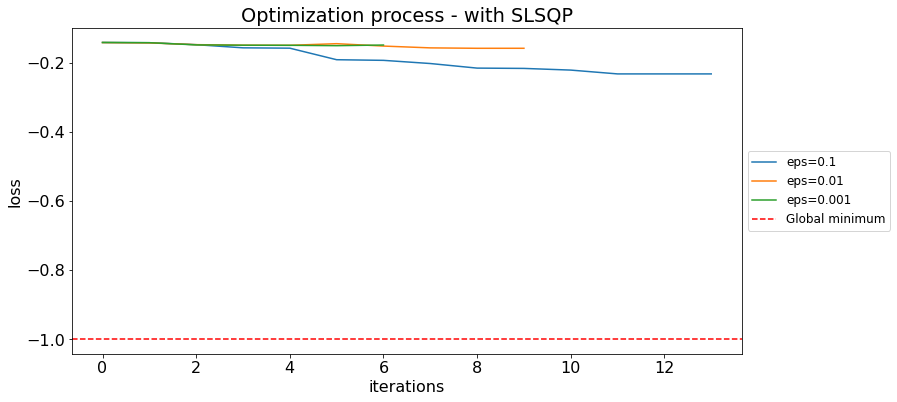


Optimization results:



optimizer    eps                                       final_params  \
0     slsqp  0.100  [0.1, 2.6415926535897927, 0.1, 0.1, 0.10000000...   
1     slsqp  0.010  [0.4483552596903812, 1.1462550684118544, 1.139...   
2     slsqp  0.001  [0.11358140846176462, 1.2706705258688389, 1.08...   

   final_loss  
0    -0.23264  
1    -0.15849  
2    -0.14983

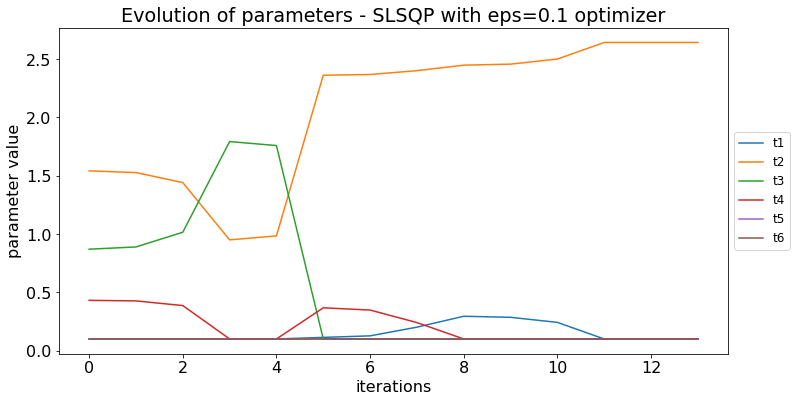

Best parameters (sum to 3.14):	[0.1   2.642 0.1   0.1   0.1   0.1  ]
Best parameters (sum to 1):	[0.032 0.841 0.032 0.032 0.032 0.032]


/home/askery/anaconda3/envs/qiskit/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


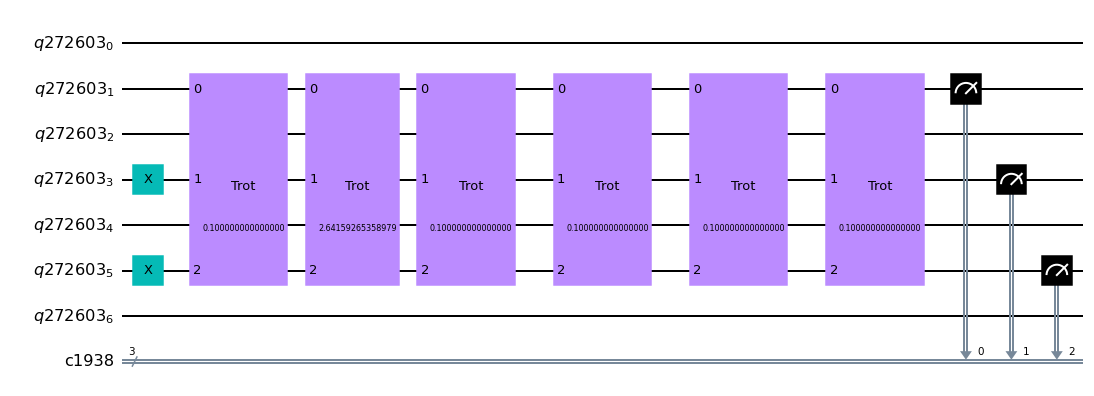

################################################################################
Single trotterization step:


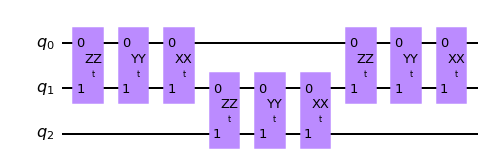

################################################################################

All steps + measurements of state tomography:


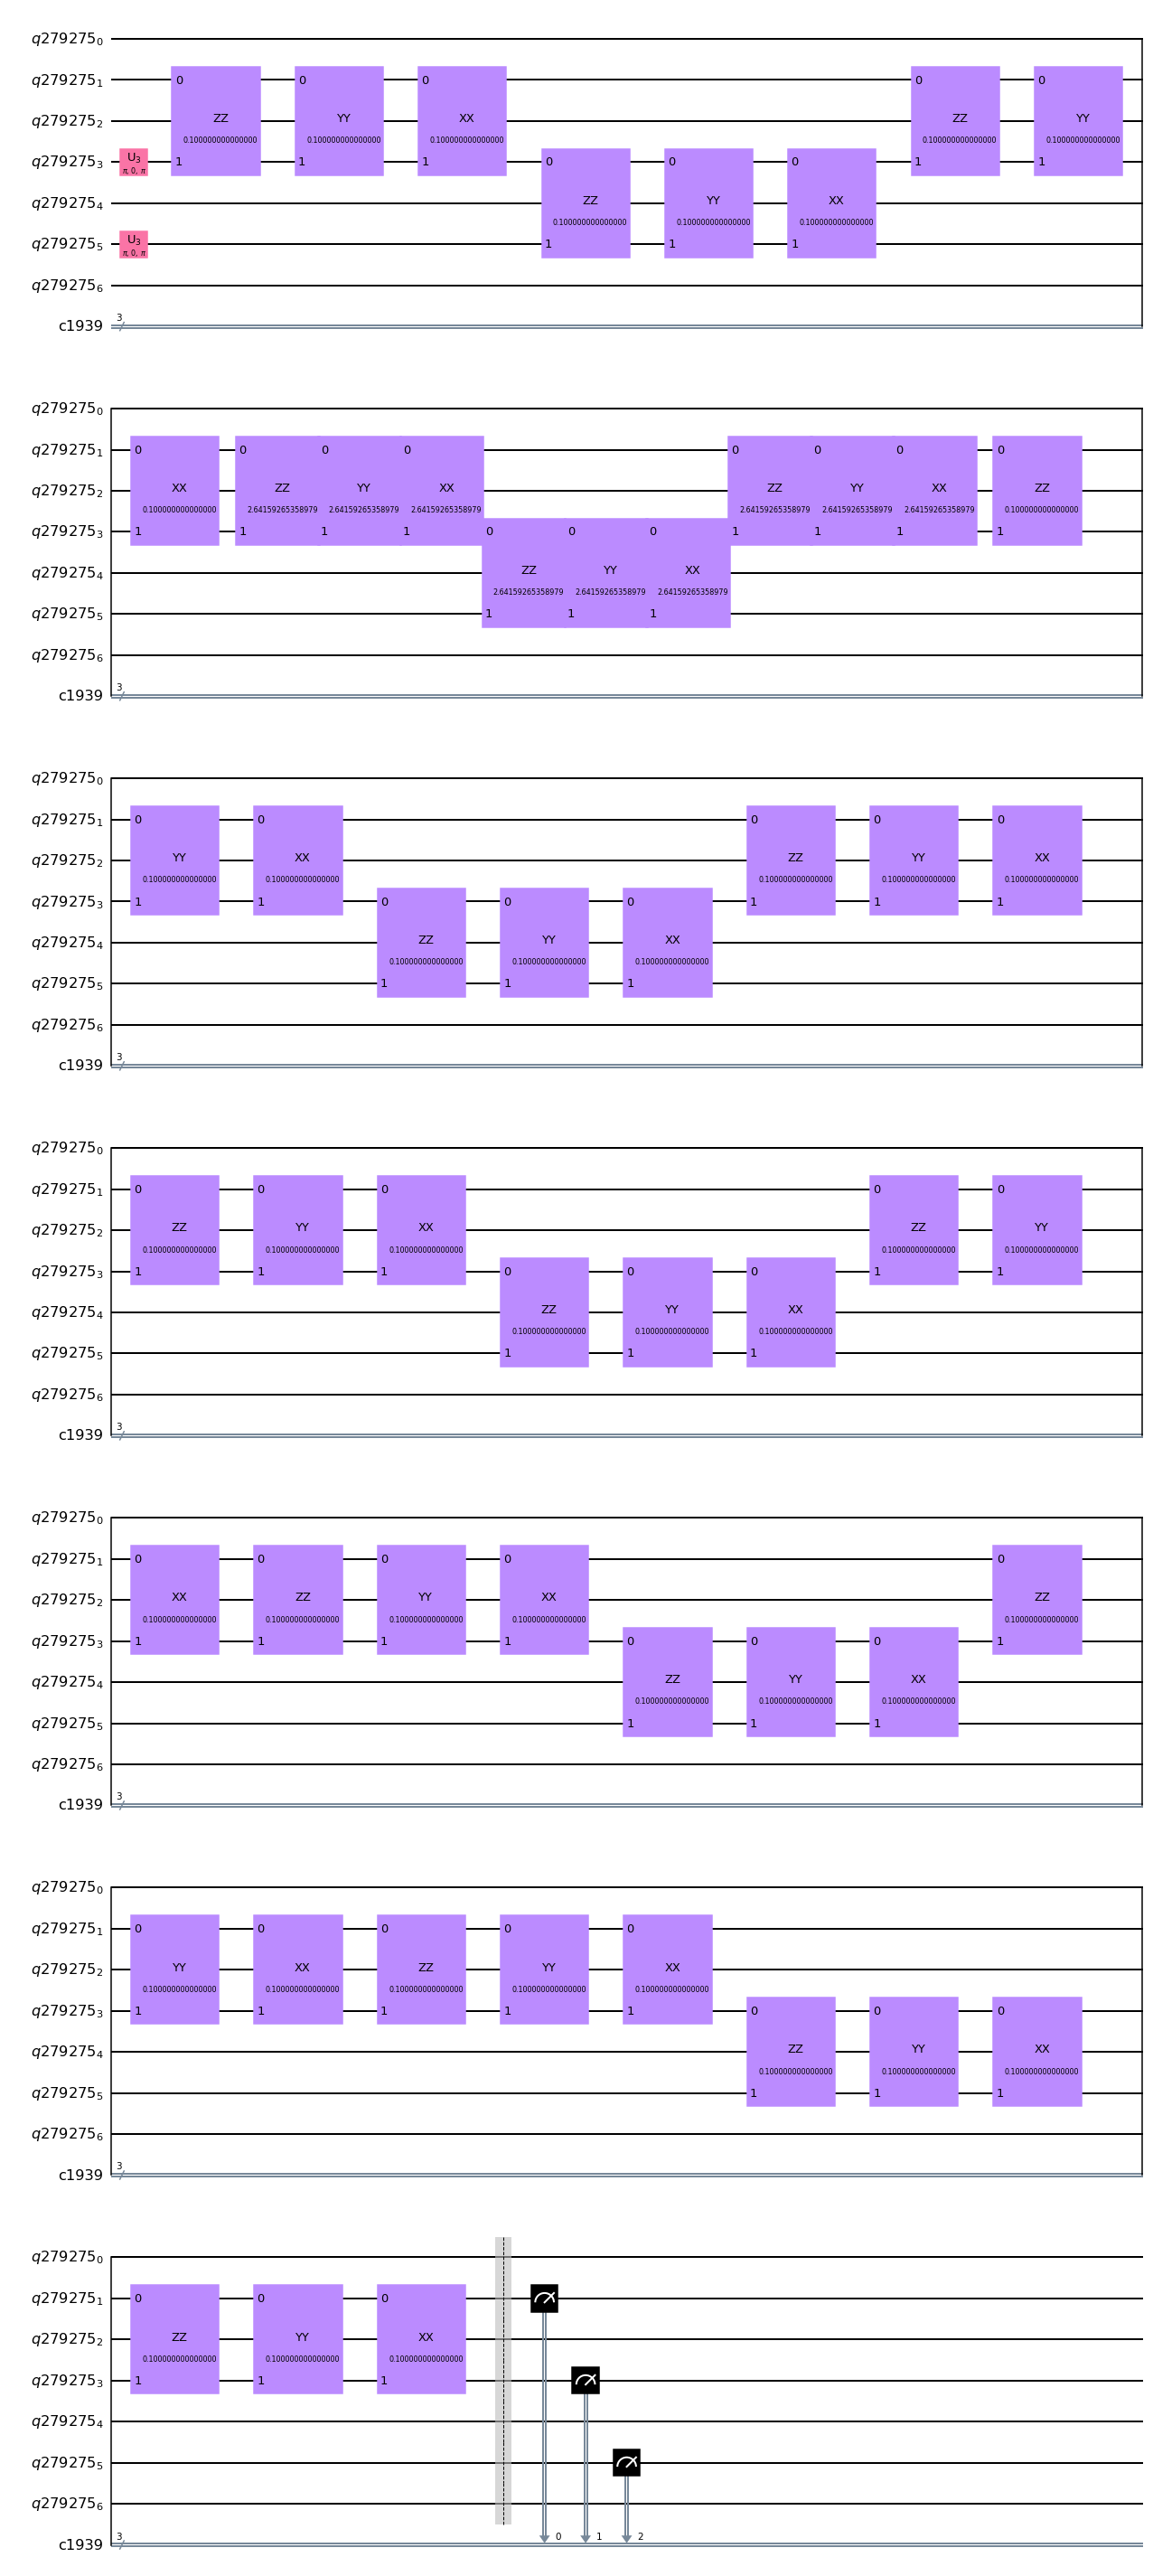

################################################################################

1/8 - Job ID 949dbc37-ad73-469f-b267-62c85bcfbdbb
2/8 - Job ID 44b4f4c5-da02-45ea-b04b-277297582162
3/8 - Job ID 7c7c9e59-bba2-4491-8437-571df89cb77a
4/8 - Job ID e65c9816-8028-452e-ab6a-4bbdc281aebf
5/8 - Job ID 7087aad4-622d-4bdb-80b2-310f53ed6df0
6/8 - Job ID 07038db6-9f1f-4e4a-8f02-ba6206cf5cca
7/8 - Job ID c3733813-a917-4663-874a-1b36fdb6cc3b
8/8 - Job ID 330b2877-f2e4-4a5d-b763-1b1d8b5c2754

################################################################################

Final results - order: 2 - strotter steps: 6

State tomography fidelity = 0.2325 ± 0.0024

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:01:07



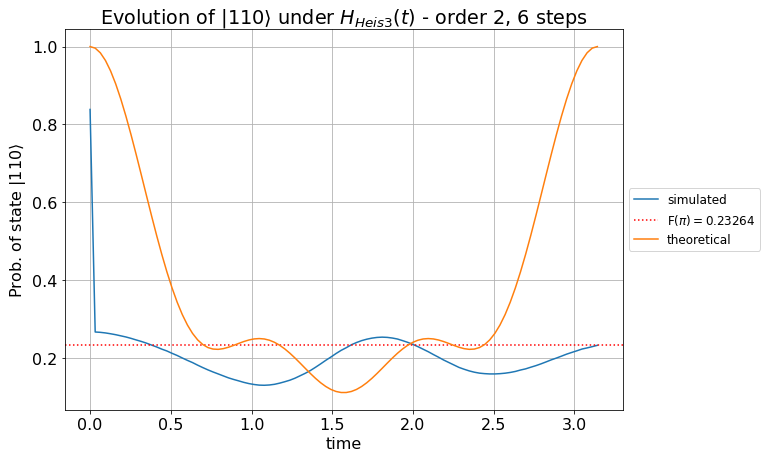




################################################################################
################################################################################
                                    Order: 2                                    
                                   # steps: 6                                   
                                 min time: 0.01                                 
################################################################################
################################################################################





/home/askery/anaconda3/envs/qiskit/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


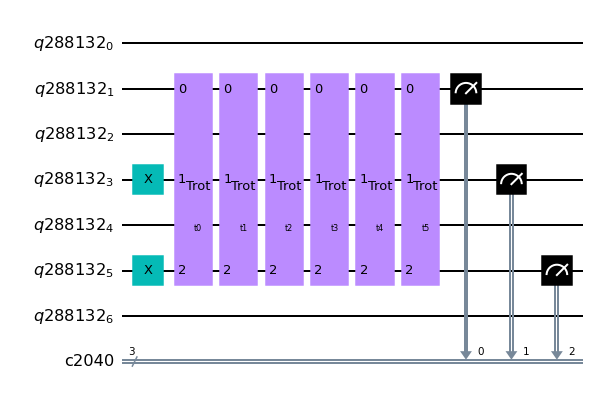

################################################################################

Starting optimization!


Optimizer: SLSQP
eps = 0.1

Iter 1 done!
Loss value: -0.15367
Current parameters: [0.01  1.635 0.957 0.52  0.01  0.01 ] (sum to 3.14)

Iter 2 done!
Loss value: -0.15718
Current parameters: [0.01  1.639 0.995 0.479 0.01  0.01 ] (sum to 3.14)

Iter 3 done!
Loss value: -0.22482
Current parameters: [0.01  1.649 1.28  0.183 0.01  0.01 ] (sum to 3.14)

Iter 4 done!
Loss value: -0.26194
Current parameters: [0.01  1.589 1.512 0.01  0.01  0.01 ] (sum to 3.14)

Iter 5 done!
Loss value: -0.25583
Current parameters: [0.021 1.451 1.609 0.01  0.025 0.026] (sum to 3.14)

Iter 6 done!
Loss value: -0.26151
Current parameters: [0.019 1.532 1.552 0.01  0.01  0.018] (sum to 3.14)

Iter 7 done!
Loss value: -0.26191
Current parameters: [0.014 1.547 1.543 0.01  0.01  0.018] (sum to 3.14)

Iter 8 done!
Loss value: -0.26167
Current parameters: [0.014 1.537 1.55  0.01  0.01  0.021] (sum to 3.14)

Optimizat

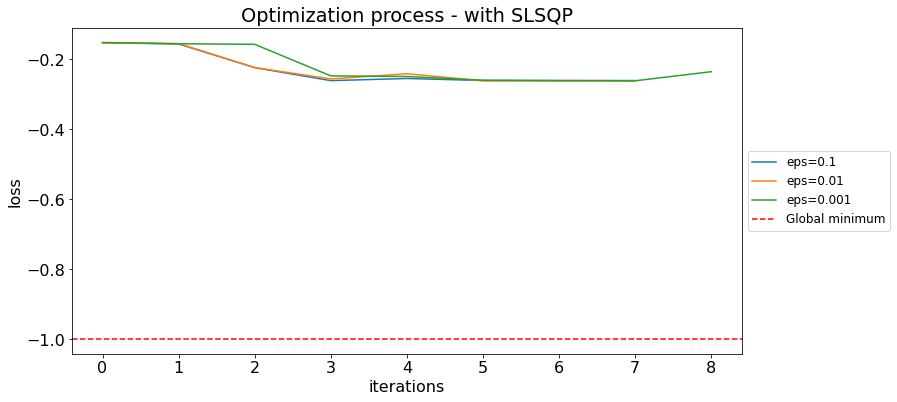


Optimization results:



optimizer    eps                                       final_params  \
1     slsqp  0.010  [0.010000000000000002, 1.5520404423234293, 1.5...   
2     slsqp  0.001  [0.01, 1.5428774986405212, 1.558693470895049, ...   
0     slsqp  0.100  [0.012148423321210789, 1.5668487546999192, 1.5...   

   final_loss  
1    -0.26247  
2    -0.26240  
0    -0.26205

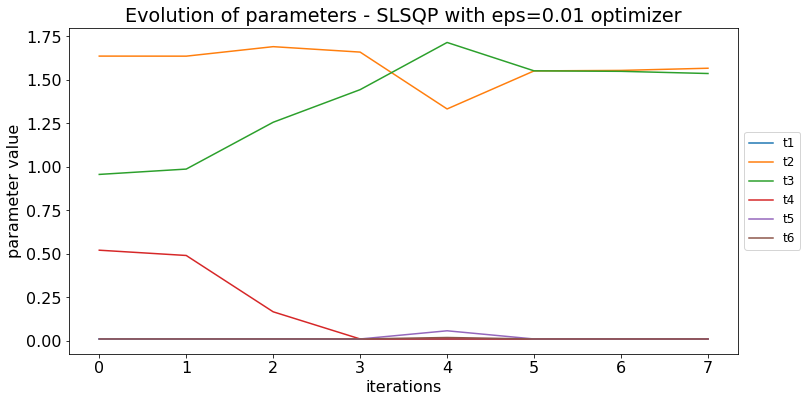

Best parameters (sum to 3.14):	[0.01  1.552 1.55  0.01  0.01  0.01 ]
Best parameters (sum to 1):	[0.003 0.494 0.493 0.003 0.003 0.003]


/home/askery/anaconda3/envs/qiskit/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


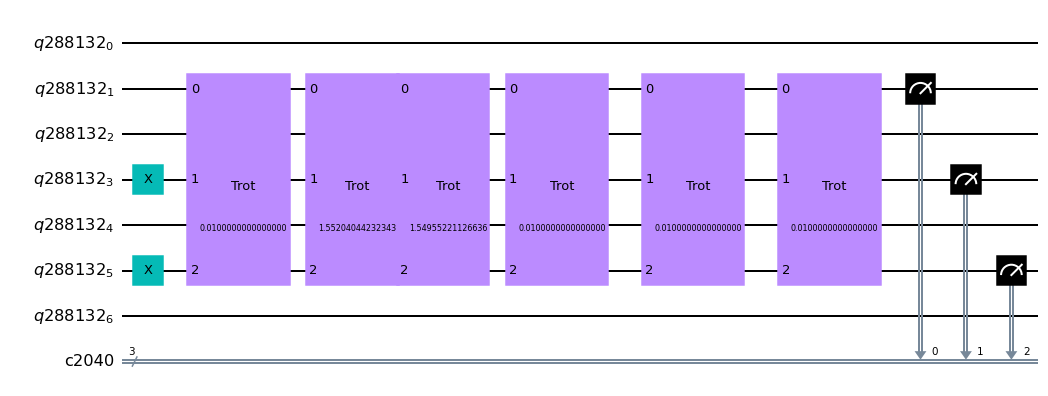

################################################################################
Single trotterization step:


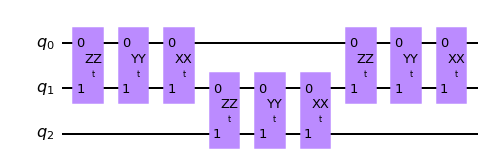

################################################################################

All steps + measurements of state tomography:


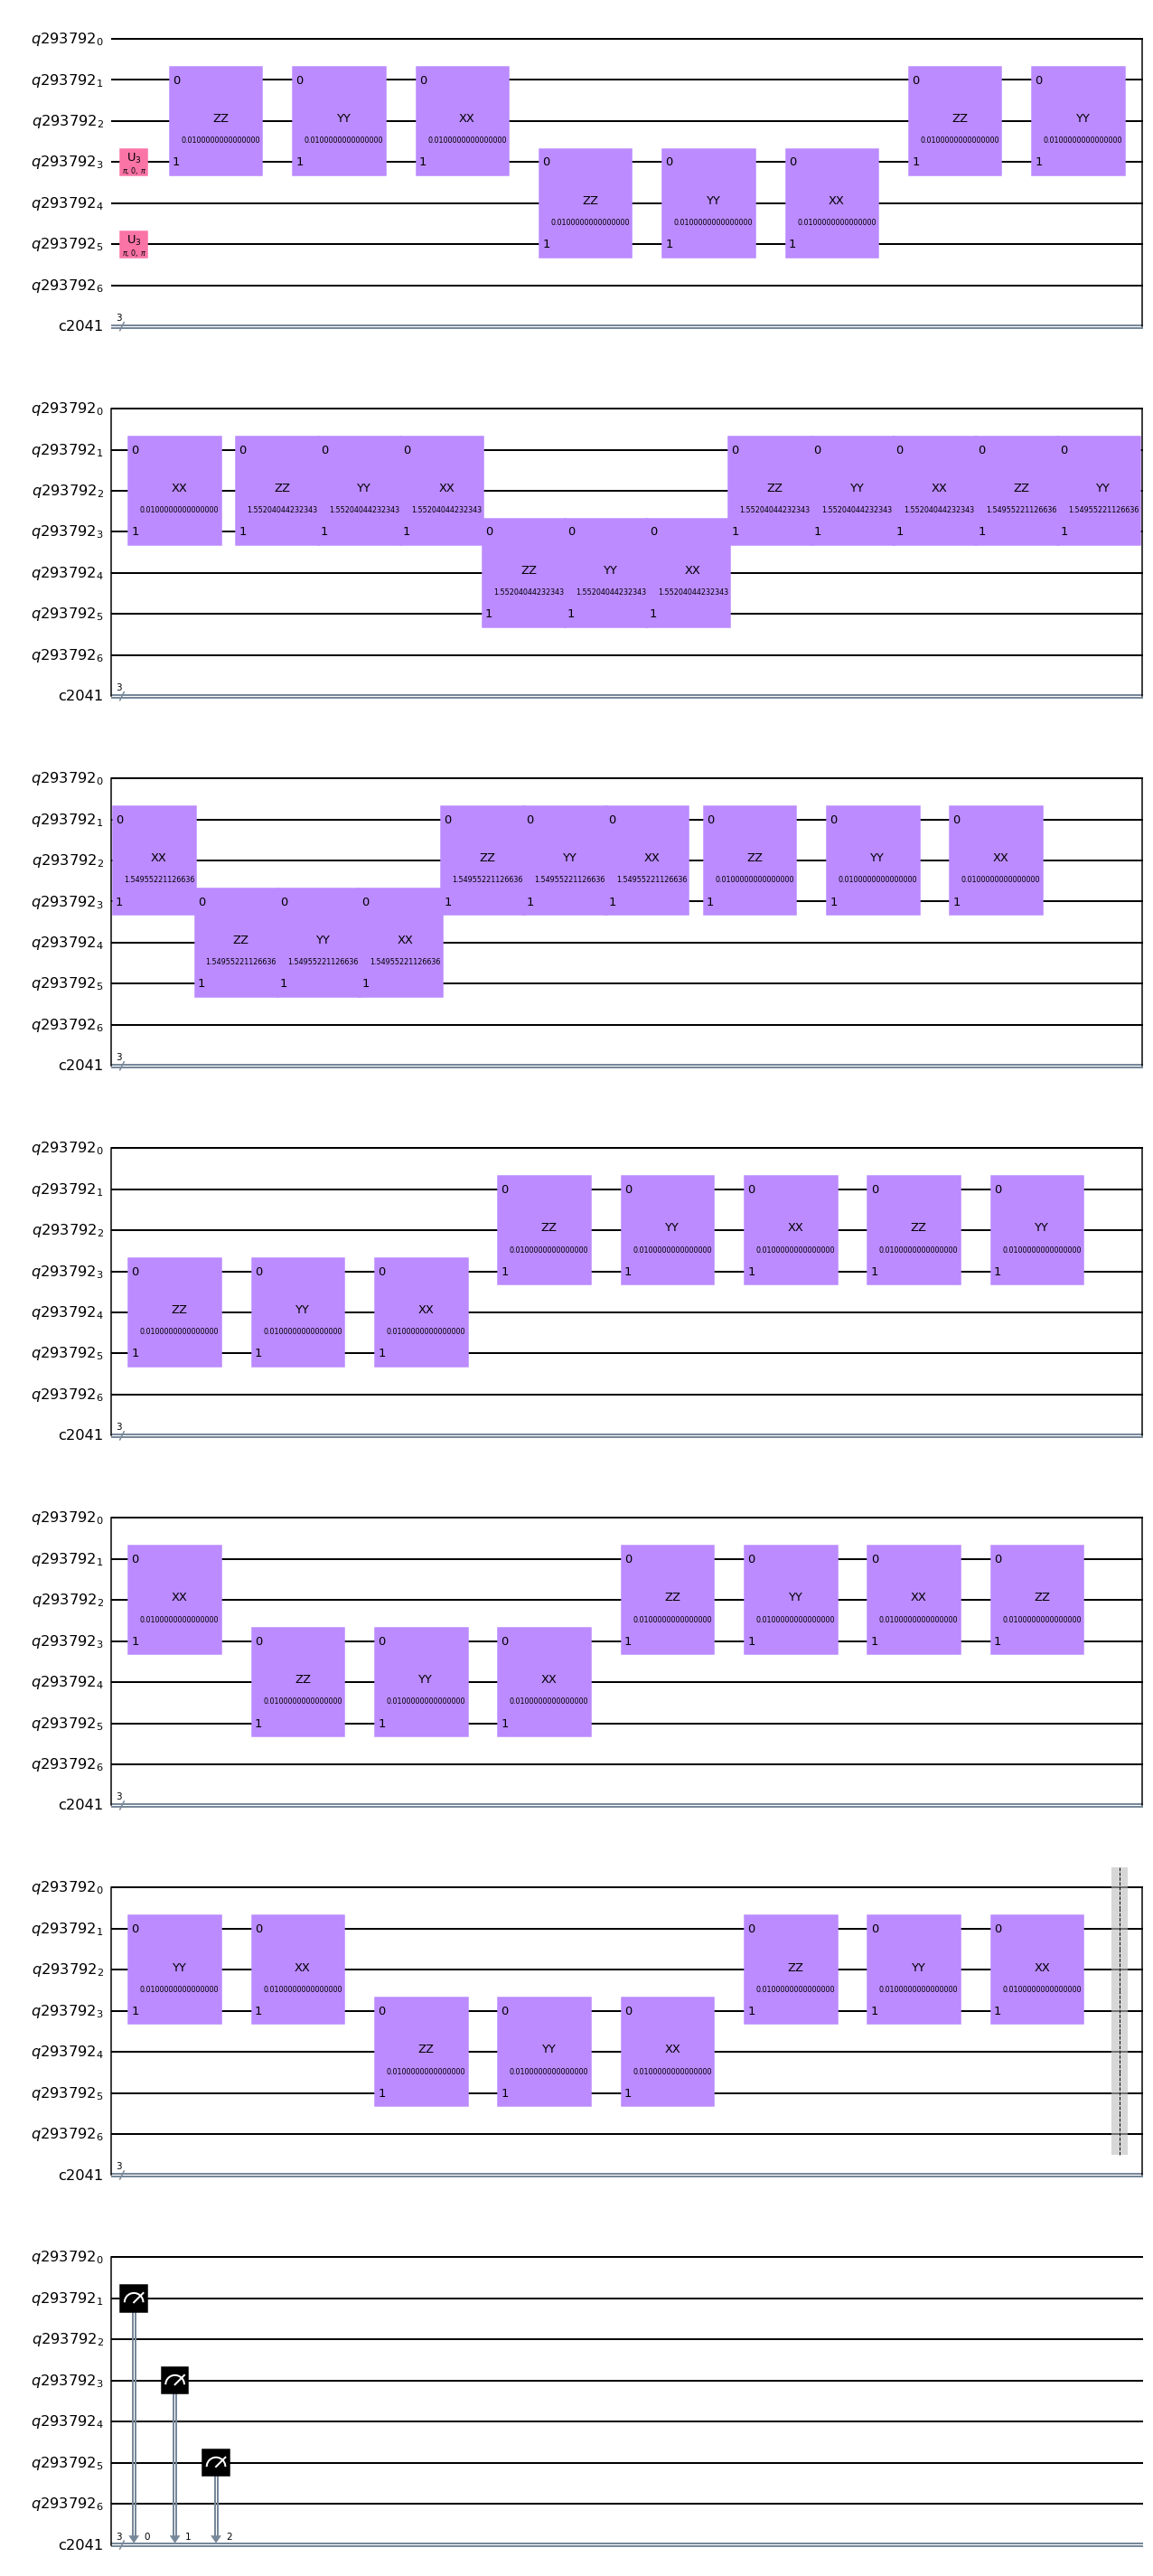

################################################################################

1/8 - Job ID c620698c-8374-4154-94ee-aff56ce6330a
2/8 - Job ID d689f599-a3fd-416d-9a2c-bd16da7cfe76
3/8 - Job ID 9bc0cfc5-22f7-4ea5-aac5-a514a4325d10
4/8 - Job ID b65fd97b-7427-4ab3-92be-95883eca5489
5/8 - Job ID 52deb4c0-0378-4746-a52a-b77d7deeb3a4
6/8 - Job ID e841f130-2fba-44d2-9057-a2313b9d1956
7/8 - Job ID e4578888-a3a4-4955-8cf4-59e63da14cfc
8/8 - Job ID 2a2a06e6-c277-4992-86c1-037e2278255f

################################################################################

Final results - order: 2 - strotter steps: 6

State tomography fidelity = 0.2630 ± 0.0030

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:01:01



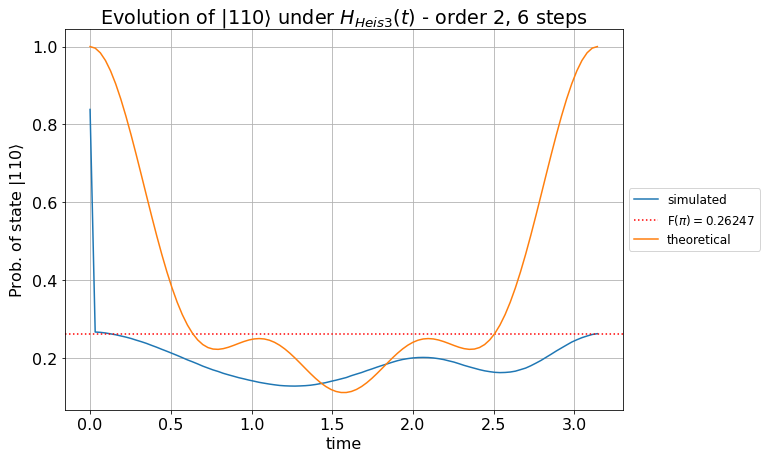




################################################################################
################################################################################
                                    Order: 2                                    
                                   # steps: 7                                   
                                 min time: 0.1                                  
################################################################################
################################################################################





/home/askery/anaconda3/envs/qiskit/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


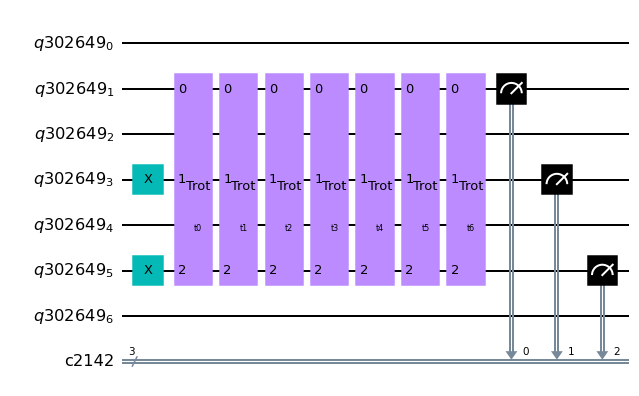

################################################################################

Starting optimization!


Optimizer: SLSQP
eps = 0.1

Iter 1 done!
Loss value: -0.14001
Current parameters: [0.1   1.501 0.822 0.419 0.1   0.1   0.1  ] (sum to 3.14)

Iter 2 done!
Loss value: -0.1404
Current parameters: [0.1   1.488 0.826 0.427 0.101 0.1   0.1  ] (sum to 3.14)

Iter 3 done!
Loss value: -0.14399
Current parameters: [0.113 1.398 0.852 0.466 0.112 0.101 0.1  ] (sum to 3.14)

Iter 4 done!
Loss value: -0.15732
Current parameters: [0.238 0.709 1.016 0.732 0.186 0.123 0.138] (sum to 3.14)

Iter 5 done!
Loss value: -0.16053
Current parameters: [0.337 0.1   1.158 0.961 0.231 0.146 0.208] (sum to 3.14)

Iter 6 done!
Loss value: -0.16198
Current parameters: [0.298 0.314 1.099 0.887 0.212 0.137 0.194] (sum to 3.14)

Iter 7 done!
Loss value: -0.16238
Current parameters: [0.305 0.232 1.108 0.932 0.219 0.138 0.208] (sum to 3.14)

Iter 8 done!
Loss value: -0.16327
Current parameters: [0.29  0.182 1.086 0.

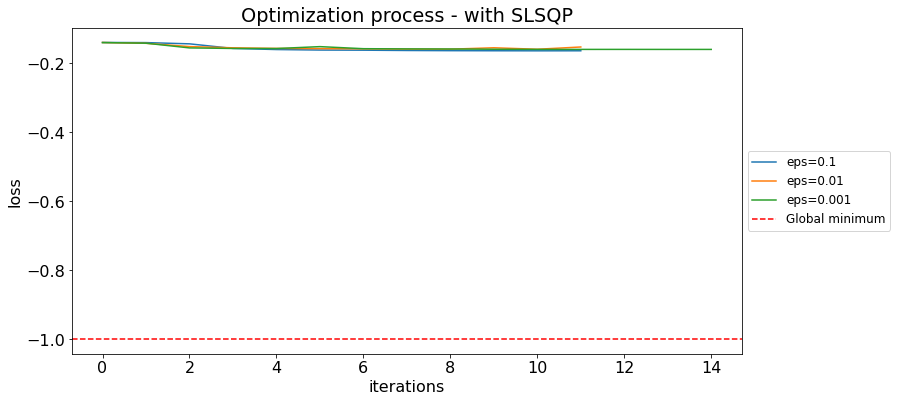


Optimization results:



optimizer    eps                                       final_params  \
0     slsqp  0.100  [0.23730353874294952, 0.28620352633632423, 1.0...   
2     slsqp  0.001  [0.3127107705267899, 0.923010098153607, 0.8187...   
1     slsqp  0.010  [0.3895619562101496, 0.8857878147195958, 0.694...   

   final_loss  
0    -0.16424  
2    -0.16017  
1    -0.15979

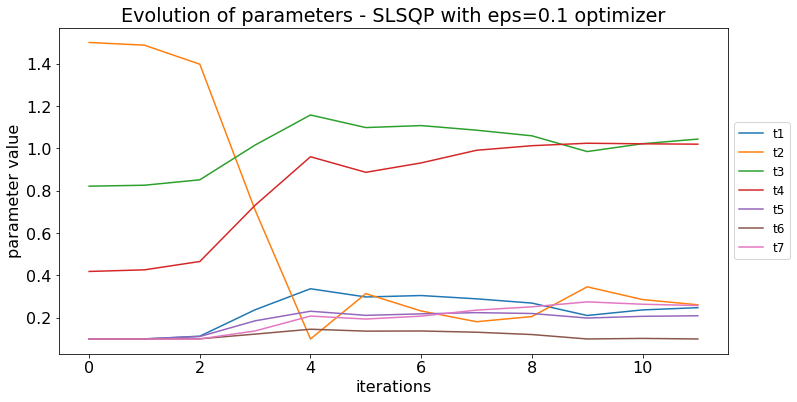

Best parameters (sum to 3.14):	[0.237 0.286 1.022 1.022 0.207 0.103 0.264]
Best parameters (sum to 1):	[0.076 0.091 0.325 0.325 0.066 0.033 0.084]


/home/askery/anaconda3/envs/qiskit/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


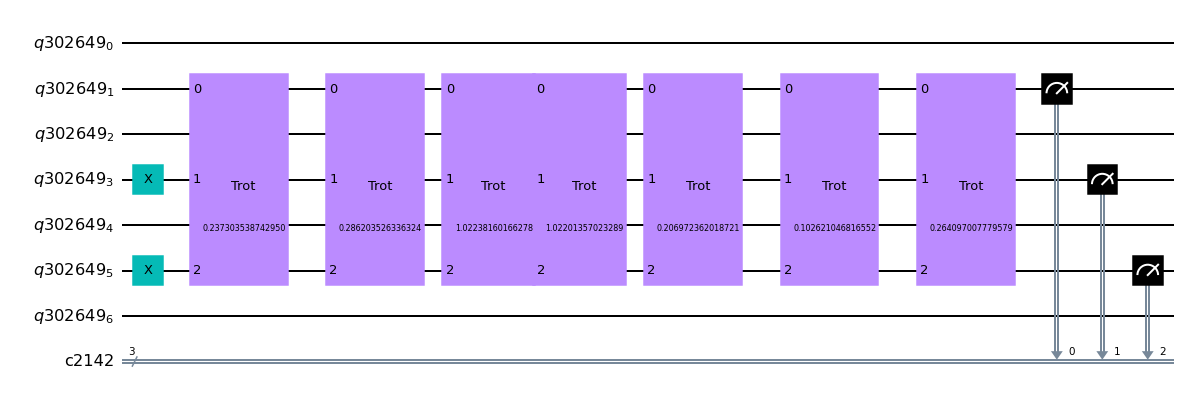

################################################################################
Single trotterization step:


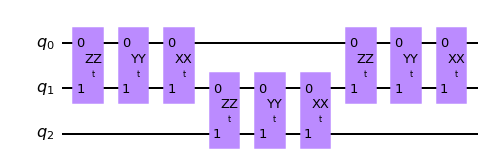

################################################################################

All steps + measurements of state tomography:


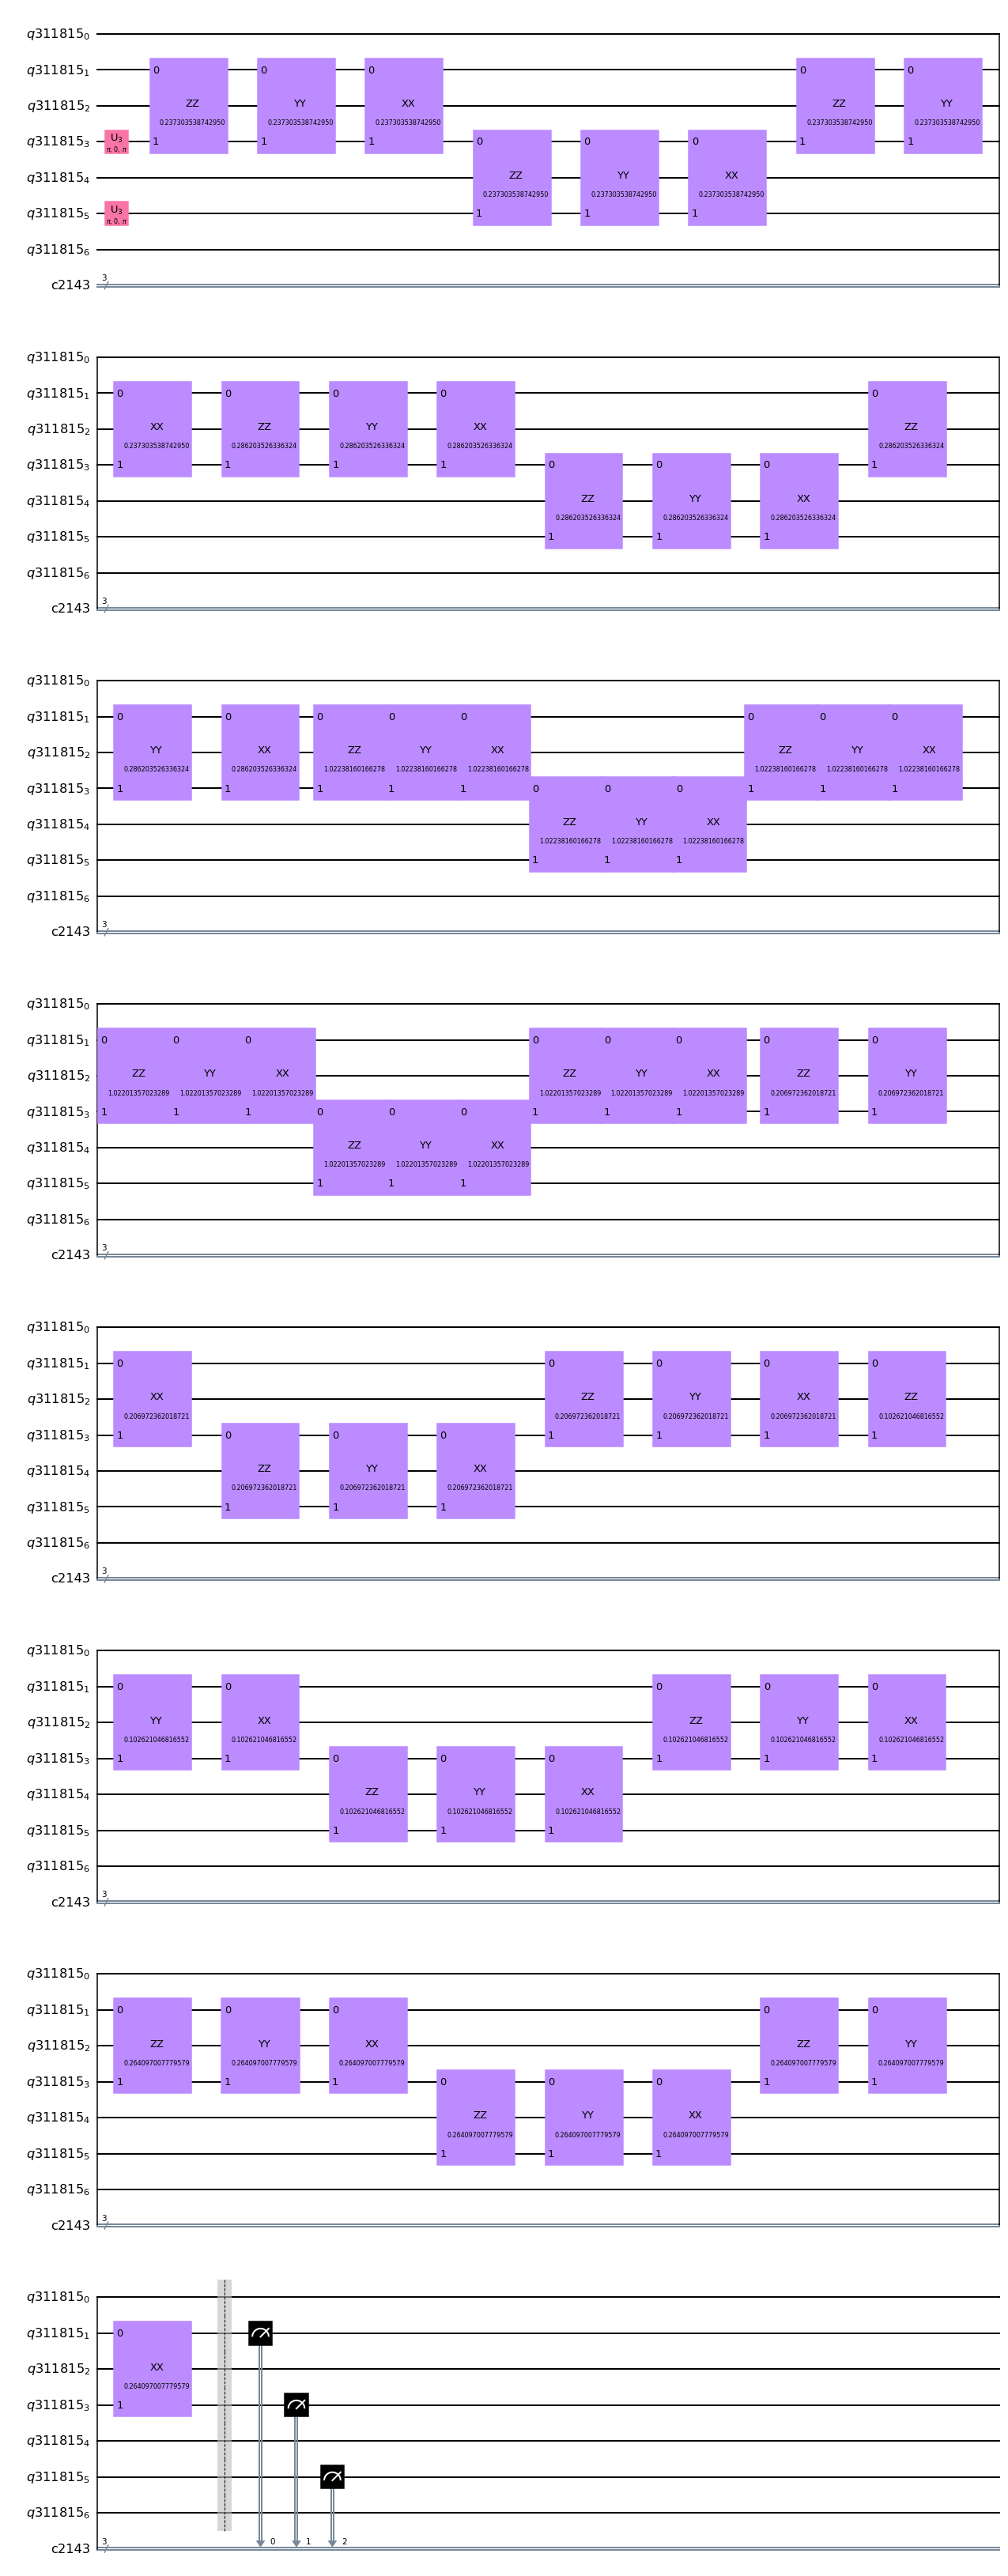

################################################################################

1/8 - Job ID 43d2bb27-5c8e-48d3-814e-abfb1a7b6de9
2/8 - Job ID 9ce5d5c5-e0e0-4463-9939-b13ba10a43c0
3/8 - Job ID 618e82df-caf5-4bb2-a6a4-b6c750b10a68
4/8 - Job ID 06fb86db-774a-4f6f-8e1d-6346e3b31530
5/8 - Job ID 82e177eb-3995-4a68-b62f-c667119fe0f1
6/8 - Job ID 8db8a5ef-1e21-426b-ad7f-ed39e29445a1
7/8 - Job ID 96acd671-02a9-43ba-abd2-c9dd53f1c31f
8/8 - Job ID 35c2c27f-3621-407f-a8a8-288dcd0a5c11

################################################################################

Final results - order: 2 - strotter steps: 7

State tomography fidelity = 0.1637 ± 0.0020

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:01:05



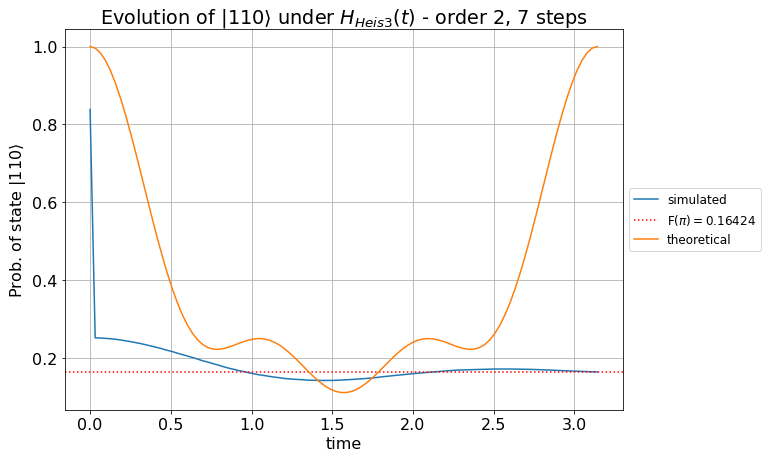




################################################################################
################################################################################
                                    Order: 2                                    
                                   # steps: 7                                   
                                 min time: 0.01                                 
################################################################################
################################################################################





/home/askery/anaconda3/envs/qiskit/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


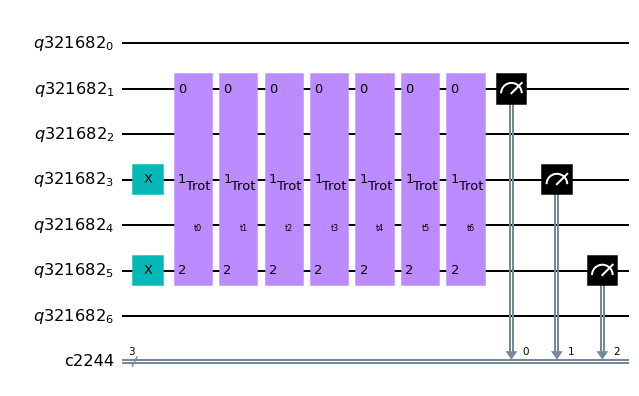

################################################################################

Starting optimization!


Optimizer: SLSQP
eps = 0.1

Iter 1 done!
Loss value: -0.14794
Current parameters: [0.01  1.626 0.948 0.528 0.01  0.01  0.01 ] (sum to 3.14)

Iter 2 done!
Loss value: -0.14949
Current parameters: [0.01  1.63  0.973 0.499 0.01  0.01  0.01 ] (sum to 3.14)

Iter 3 done!
Loss value: -0.17994
Current parameters: [0.01  1.659 1.143 0.299 0.01  0.01  0.01 ] (sum to 3.14)

Iter 4 done!
Loss value: -0.24373
Current parameters: [0.01  1.657 1.435 0.01  0.01  0.01  0.01 ] (sum to 3.14)

Iter 5 done!
Loss value: -0.24818
Current parameters: [0.01  1.567 1.518 0.01  0.01  0.01  0.017] (sum to 3.14)

Iter 6 done!
Loss value: -0.2483
Current parameters: [0.01  1.533 1.552 0.01  0.01  0.01  0.016] (sum to 3.14)

Iter 7 done!
Loss value: -0.24855
Current parameters: [0.01  1.543 1.544 0.01  0.01  0.01  0.014] (sum to 3.14)

Iter 8 done!
Loss value: -0.24857
Current parameters: [0.01  1.542 1.547 0.

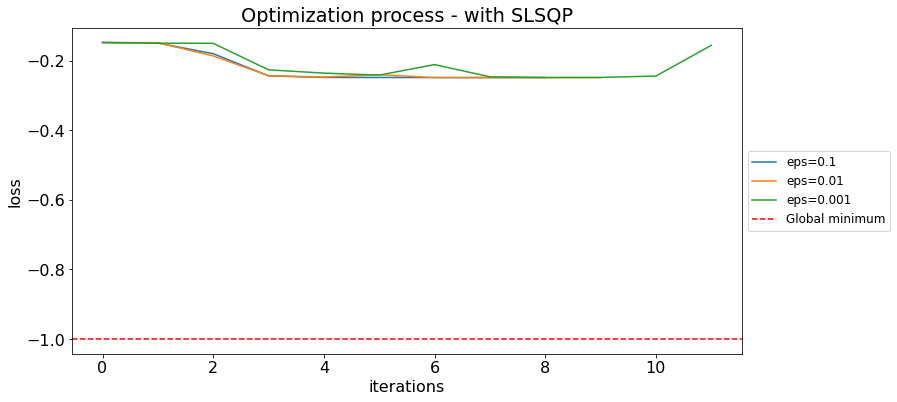


Optimization results:



optimizer    eps                                       final_params  \
1     slsqp  0.010  [0.01, 1.5483040923247497, 1.543288561265044, ...   
2     slsqp  0.001  [0.010019369174806335, 1.5490977517052518, 1.5...   
0     slsqp  0.100  [0.010000058076111287, 1.5417970166528416, 1.5...   

   final_loss  
1    -0.24871  
2    -0.24871  
0    -0.24857

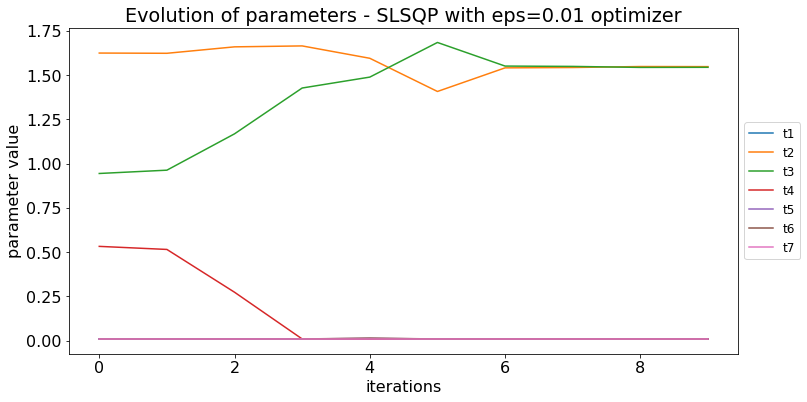

Best parameters (sum to 3.14):	[0.01  1.548 1.543 0.01  0.01  0.01  0.01 ]
Best parameters (sum to 1):	[0.003 0.493 0.491 0.003 0.003 0.003 0.003]


/home/askery/anaconda3/envs/qiskit/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


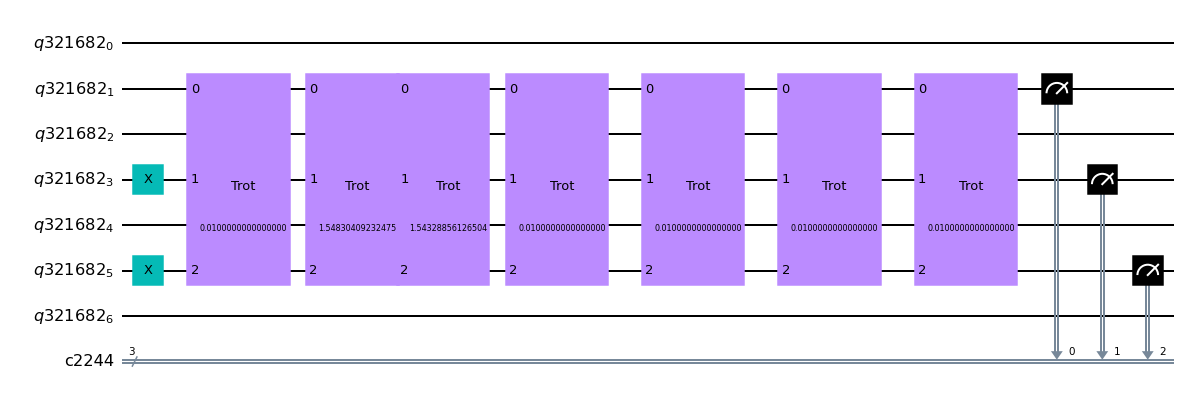

################################################################################
Single trotterization step:


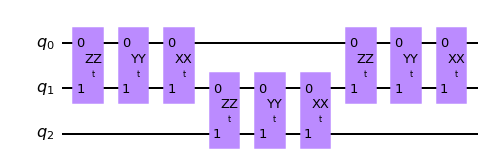

################################################################################

All steps + measurements of state tomography:


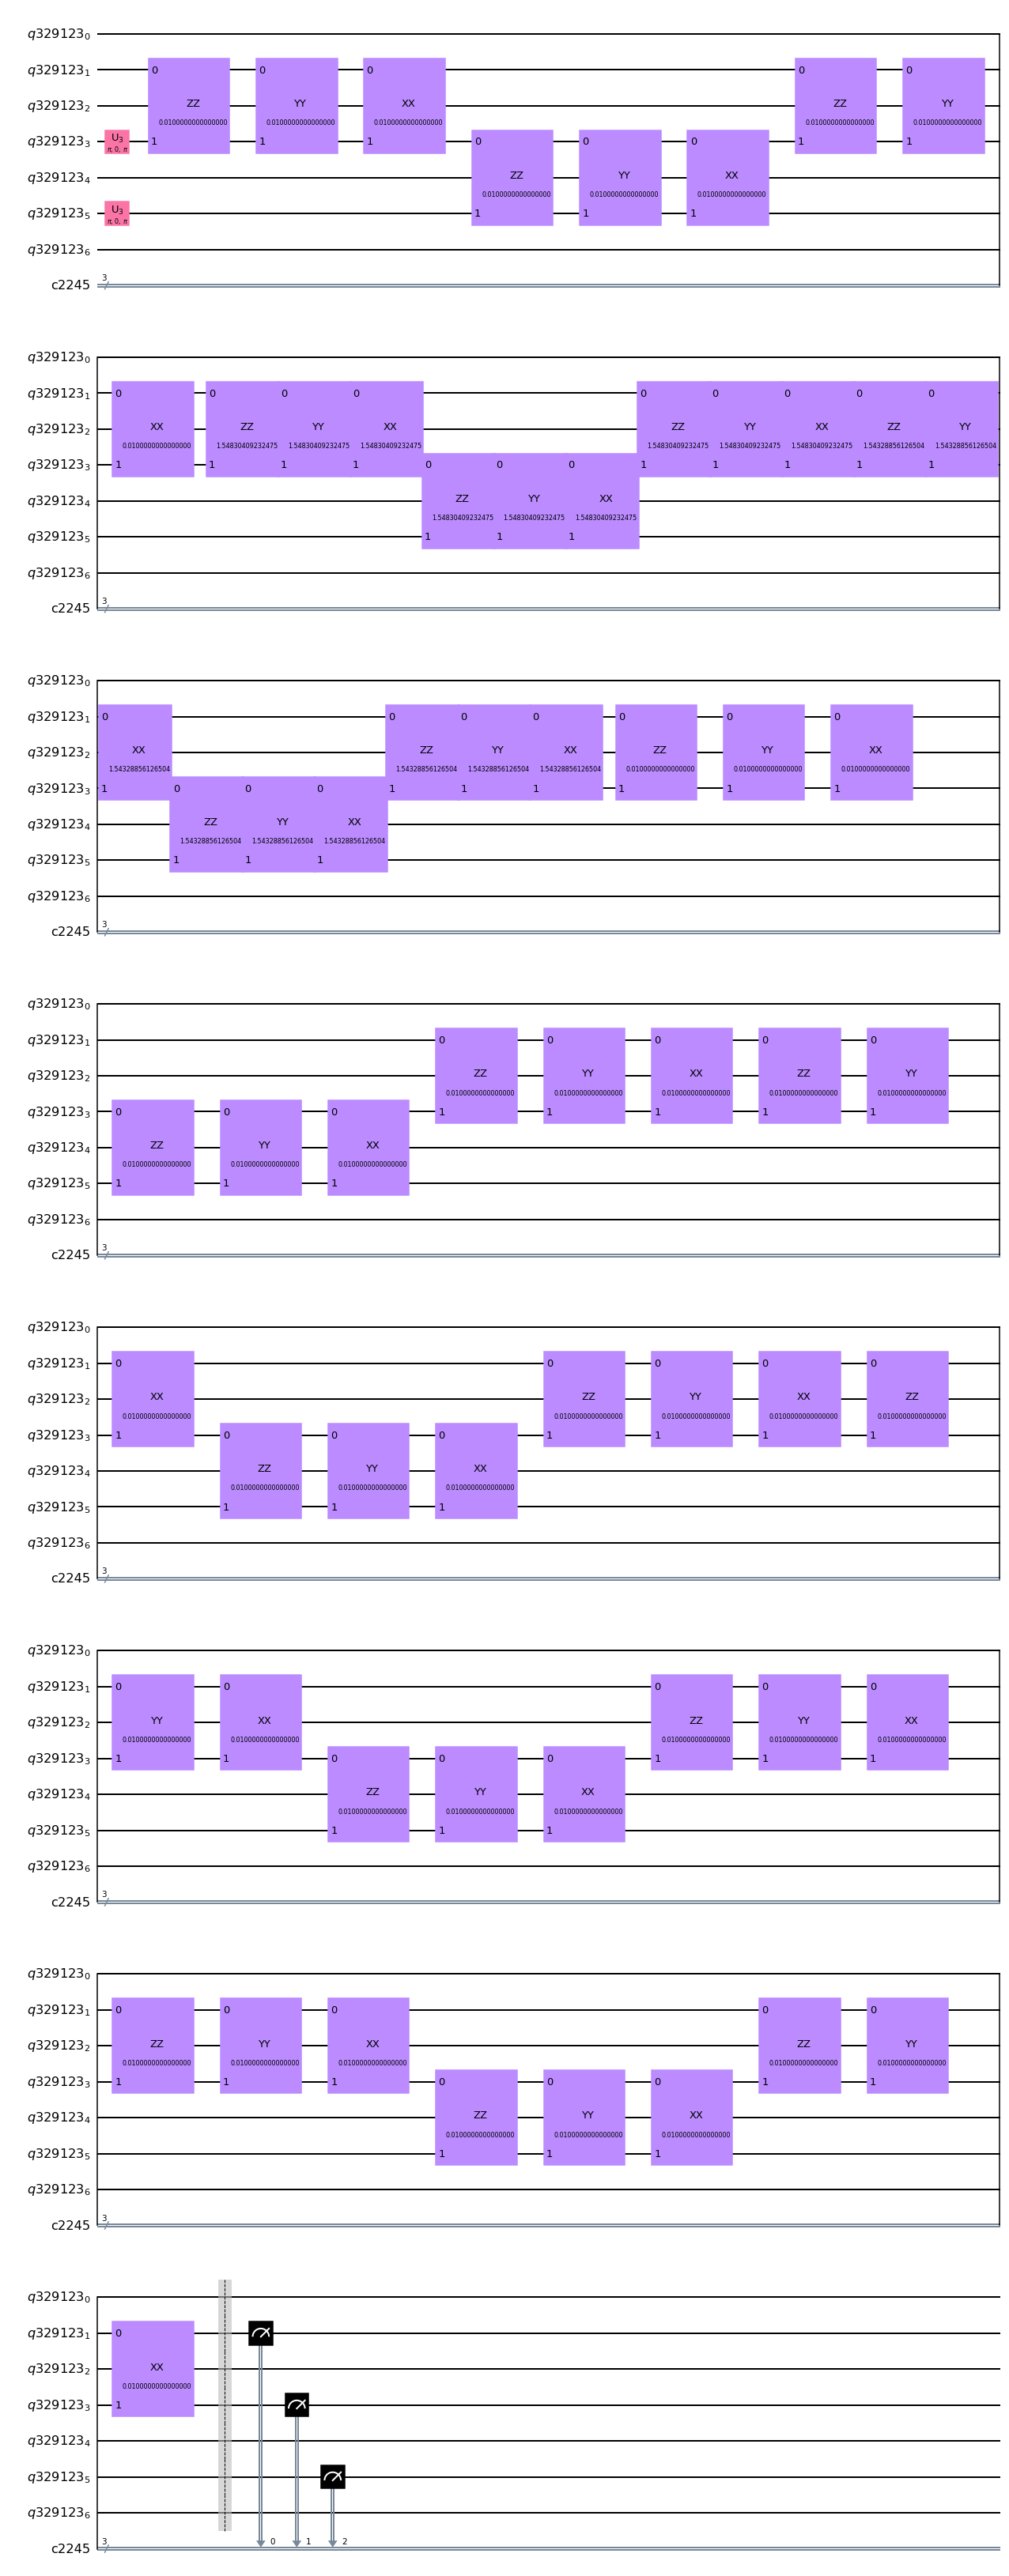

################################################################################

1/8 - Job ID 1b0d3ede-68cf-4dc6-8a82-19269b47c7ed
2/8 - Job ID 0affc493-1518-4b96-bc30-f9dec8d1ba03
3/8 - Job ID e72ced99-5ef3-49bc-a65e-bf1c62ef2434
4/8 - Job ID 258fbfb8-a628-4435-bb59-9408fb645550
5/8 - Job ID 1ea33586-960e-4e1c-9d3f-fcc9a7a883f8
6/8 - Job ID 6058b4cc-18b5-402b-9034-5fa547db8ce7
7/8 - Job ID 692811f0-cd80-42f3-aa2b-e307b03c0304
8/8 - Job ID 0fa28fc9-bfb6-4284-833e-4ff1079de435

################################################################################

Final results - order: 2 - strotter steps: 7

State tomography fidelity = 0.2481 ± 0.0026

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:01:02



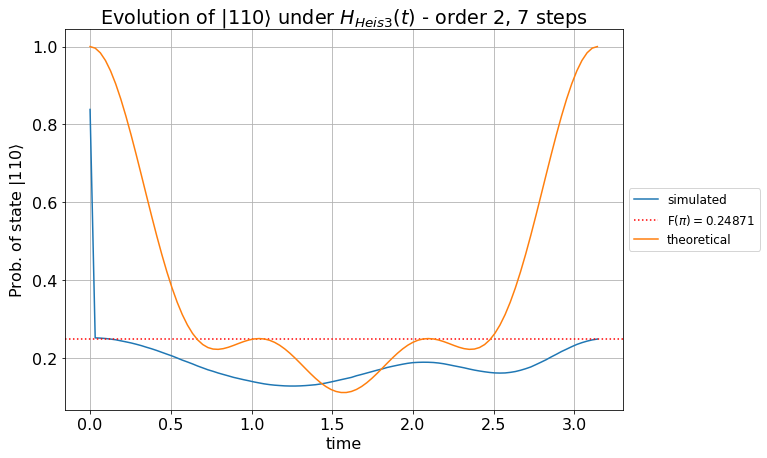




################################################################################
################################################################################
                                    Order: 2                                    
                                   # steps: 8                                   
                                 min time: 0.1                                  
################################################################################
################################################################################





/home/askery/anaconda3/envs/qiskit/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


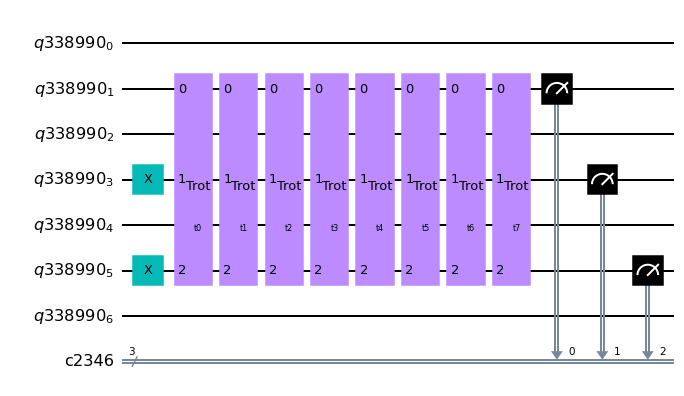

################################################################################

Starting optimization!


Optimizer: SLSQP
eps = 0.1

Iter 1 done!
Loss value: -0.14058
Current parameters: [0.1   1.189 0.518 0.104 0.1   0.1   0.1   0.931] (sum to 3.14)

Iter 2 done!
Loss value: -0.14081
Current parameters: [0.1   1.181 0.513 0.102 0.101 0.1   0.1   0.944] (sum to 3.14)

Iter 3 done!
Loss value: -0.14184
Current parameters: [0.1   1.141 0.486 0.1   0.104 0.1   0.1   1.011] (sum to 3.14)

Iter 4 done!
Loss value: -0.12962
Current parameters: [0.1   0.88  0.297 0.1   0.1   0.1   0.1   1.464] (sum to 3.14)

Iter 5 done!
Loss value: -0.14344
Current parameters: [0.1   1.049 0.405 0.1   0.1   0.1   0.1   1.188] (sum to 3.14)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.14381
            Iterations: 5
            Function evaluations: 57
            Gradient evaluations: 5

Total time of optimization: 00:00:35

Optimizer: SLSQP
eps = 0.01

Iter

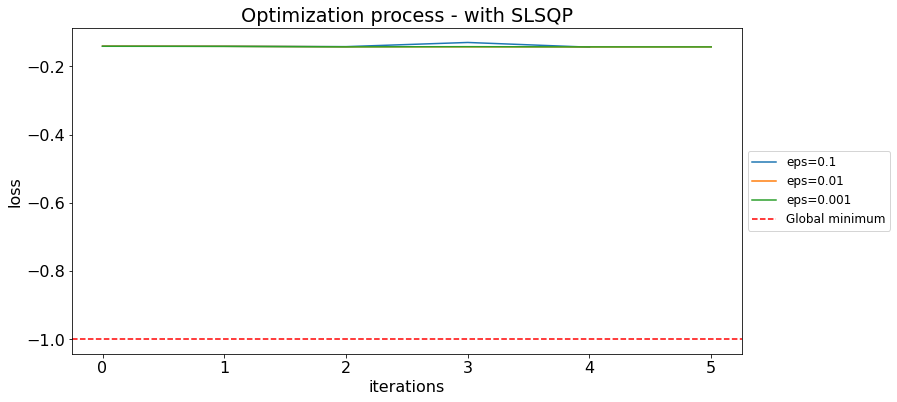


Optimization results:



optimizer    eps                                       final_params  \
0     slsqp  0.100  [0.10000000000000002, 1.0726557802748815, 0.43...   
1     slsqp  0.010  [0.10000000000000002, 1.0938347238857684, 0.29...   
2     slsqp  0.001  [0.11416371871904266, 0.9461213673646357, 0.61...   

   final_loss  
0    -0.14381  
1    -0.14276  
2    -0.14262

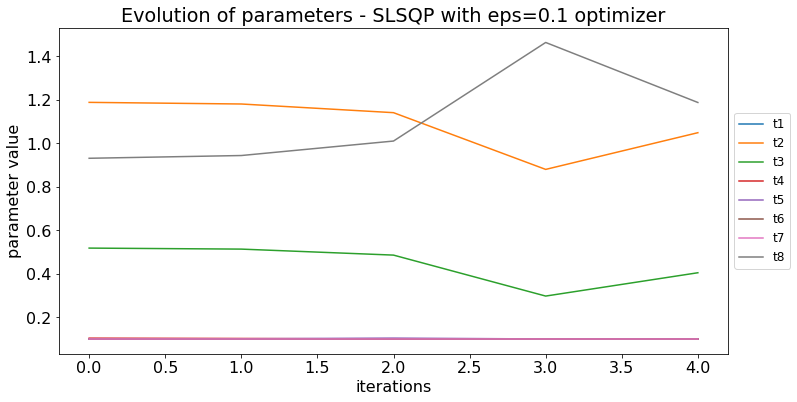

Best parameters (sum to 3.14):	[0.1   1.073 0.436 0.1   0.103 0.1   0.1   1.13 ]
Best parameters (sum to 1):	[0.032 0.341 0.139 0.032 0.033 0.032 0.032 0.36 ]


/home/askery/anaconda3/envs/qiskit/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


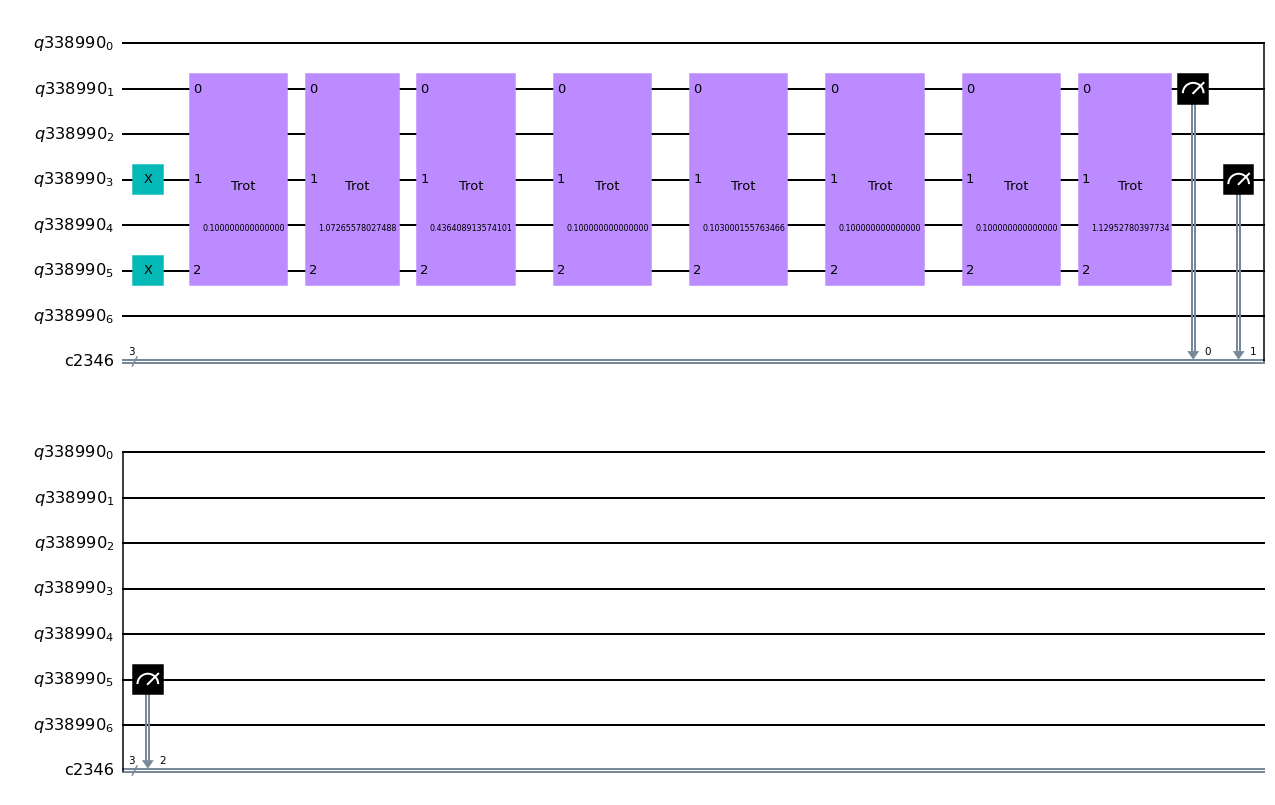

################################################################################
Single trotterization step:


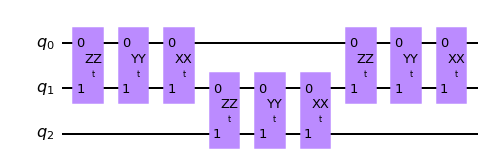

################################################################################

All steps + measurements of state tomography:


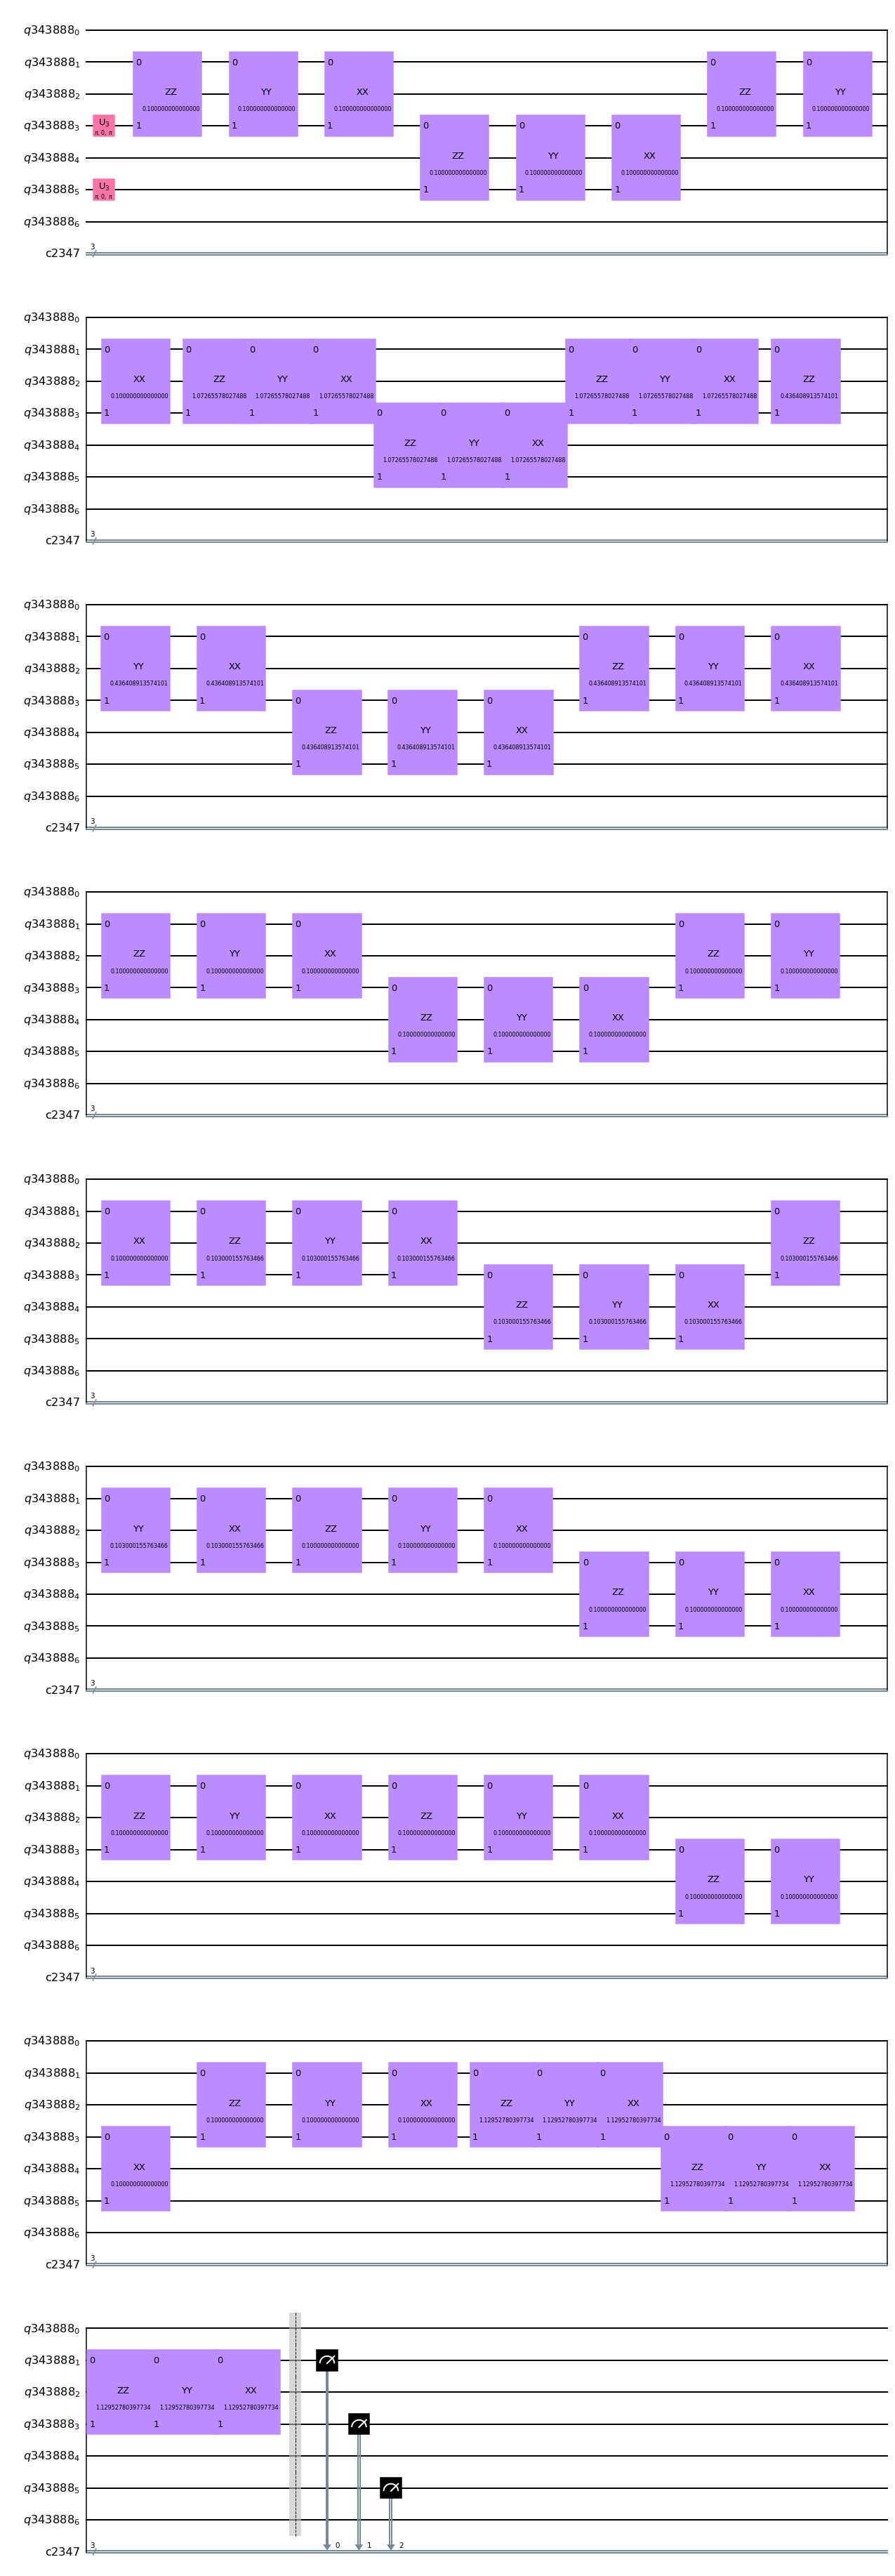

################################################################################

1/8 - Job ID b77c517c-7e9e-4ff8-b9a1-12c1528e779e
2/8 - Job ID db15adf6-53da-4e63-a544-393046a240f1
3/8 - Job ID 360a9d25-08af-43b6-9d50-587a929696ca
4/8 - Job ID 6bc6e6bf-caa9-4d6f-b8b2-89bb309bb6f5
5/8 - Job ID da6b3030-51e9-4373-8694-e7e95d9eca25
6/8 - Job ID c5472c6c-753b-4580-9a16-c24964155808
7/8 - Job ID ee172627-fc5a-4255-adc8-35330ae29cee
8/8 - Job ID d734fce8-2ff2-449b-a579-f131c94c1613

################################################################################

Final results - order: 2 - strotter steps: 8

State tomography fidelity = 0.1410 ± 0.0019

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:01:19



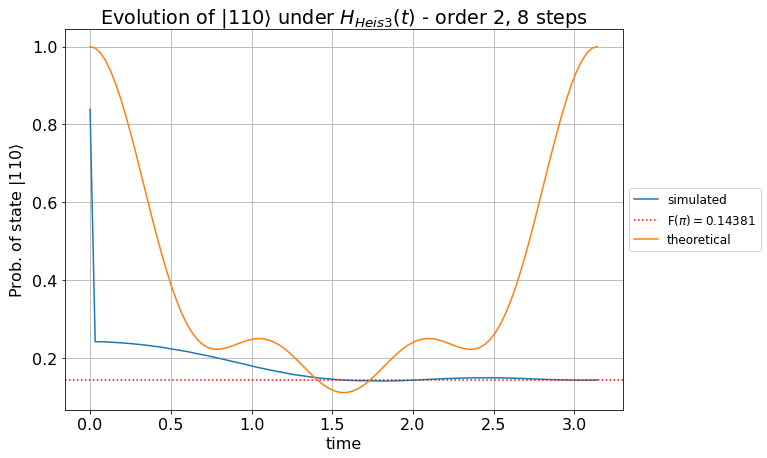




################################################################################
################################################################################
                                    Order: 2                                    
                                   # steps: 8                                   
                                 min time: 0.01                                 
################################################################################
################################################################################





/home/askery/anaconda3/envs/qiskit/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


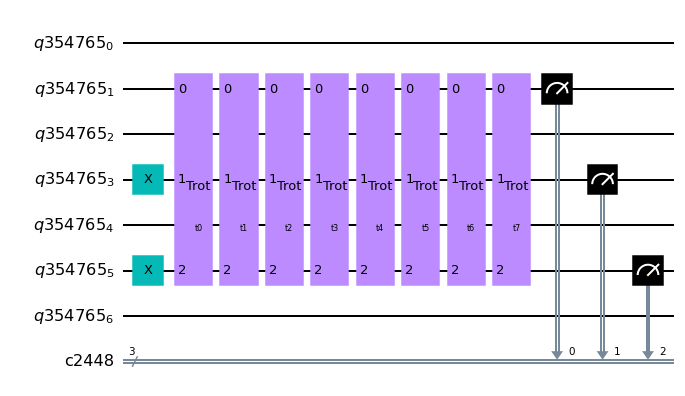

################################################################################

Starting optimization!


Optimizer: SLSQP
eps = 0.1

Iter 1 done!
Loss value: -0.14244
Current parameters: [0.01  1.292 0.603 0.189 0.01  0.01  0.01  1.017] (sum to 3.14)

Iter 2 done!
Loss value: -0.14343
Current parameters: [0.01  1.286 0.593 0.175 0.01  0.01  0.01  1.047] (sum to 3.14)

Iter 3 done!
Loss value: -0.15292
Current parameters: [0.01  1.242 0.536 0.099 0.01  0.01  0.01  1.225] (sum to 3.14)

Iter 4 done!
Loss value: -0.16143
Current parameters: [0.01  1.168 0.376 0.01  0.01  0.01  0.01  1.548] (sum to 3.14)

Iter 5 done!
Loss value: -0.1743
Current parameters: [0.01  1.244 0.362 0.01  0.01  0.01  0.01  1.486] (sum to 3.14)

Iter 6 done!
Loss value: -0.18402
Current parameters: [0.01  1.801 0.01  0.01  0.01  0.01  0.01  1.281] (sum to 3.14)

Iter 7 done!
Loss value: -0.23776
Current parameters: [0.01  1.577 0.01  0.01  0.01  0.01  0.01  1.504] (sum to 3.14)

Iter 8 done!
Loss value: -0.23719

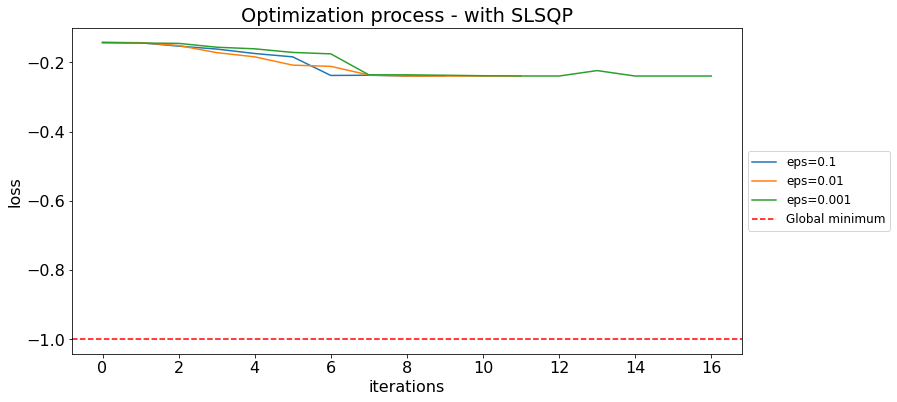


Optimization results:



optimizer    eps                                       final_params  \
1     slsqp  0.010  [0.010000000000000009, 1.538633743891405, 0.01...   
2     slsqp  0.001  [0.01, 1.5386323499802317, 0.01000000000000000...   
0     slsqp  0.100  [0.020036982962773193, 1.5367248116607344, 0.0...   

   final_loss  
1    -0.23948  
2    -0.23948  
0    -0.23908

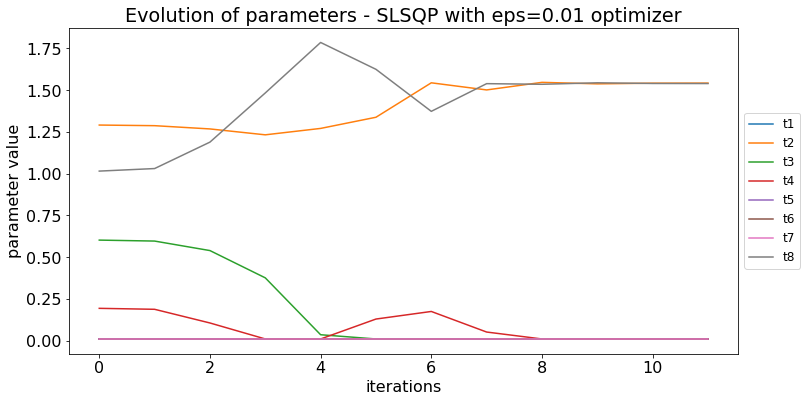

Best parameters (sum to 3.14):	[0.01  1.539 0.01  0.01  0.01  0.01  0.01  1.543]
Best parameters (sum to 1):	[0.003 0.49  0.003 0.003 0.003 0.003 0.003 0.491]


/home/askery/anaconda3/envs/qiskit/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


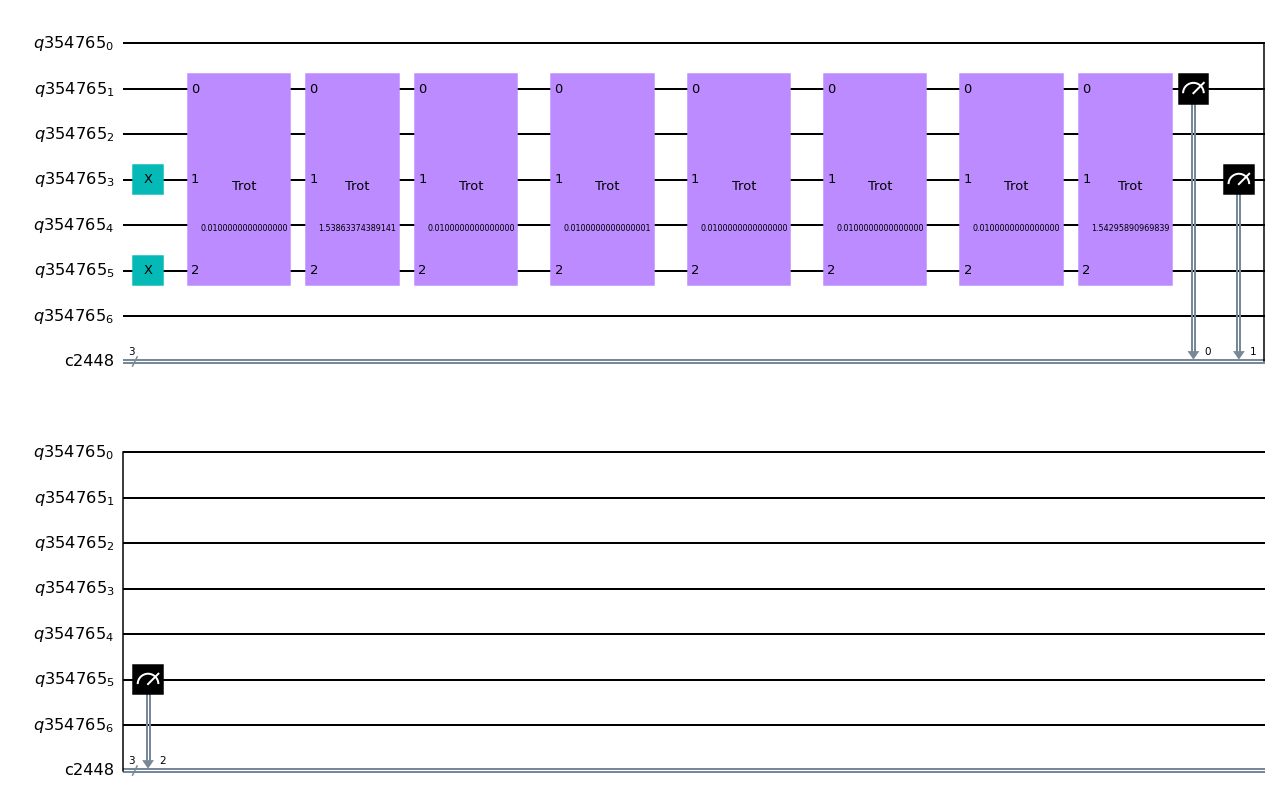

################################################################################
Single trotterization step:


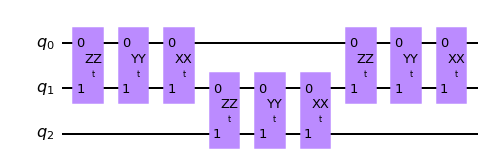

################################################################################

All steps + measurements of state tomography:


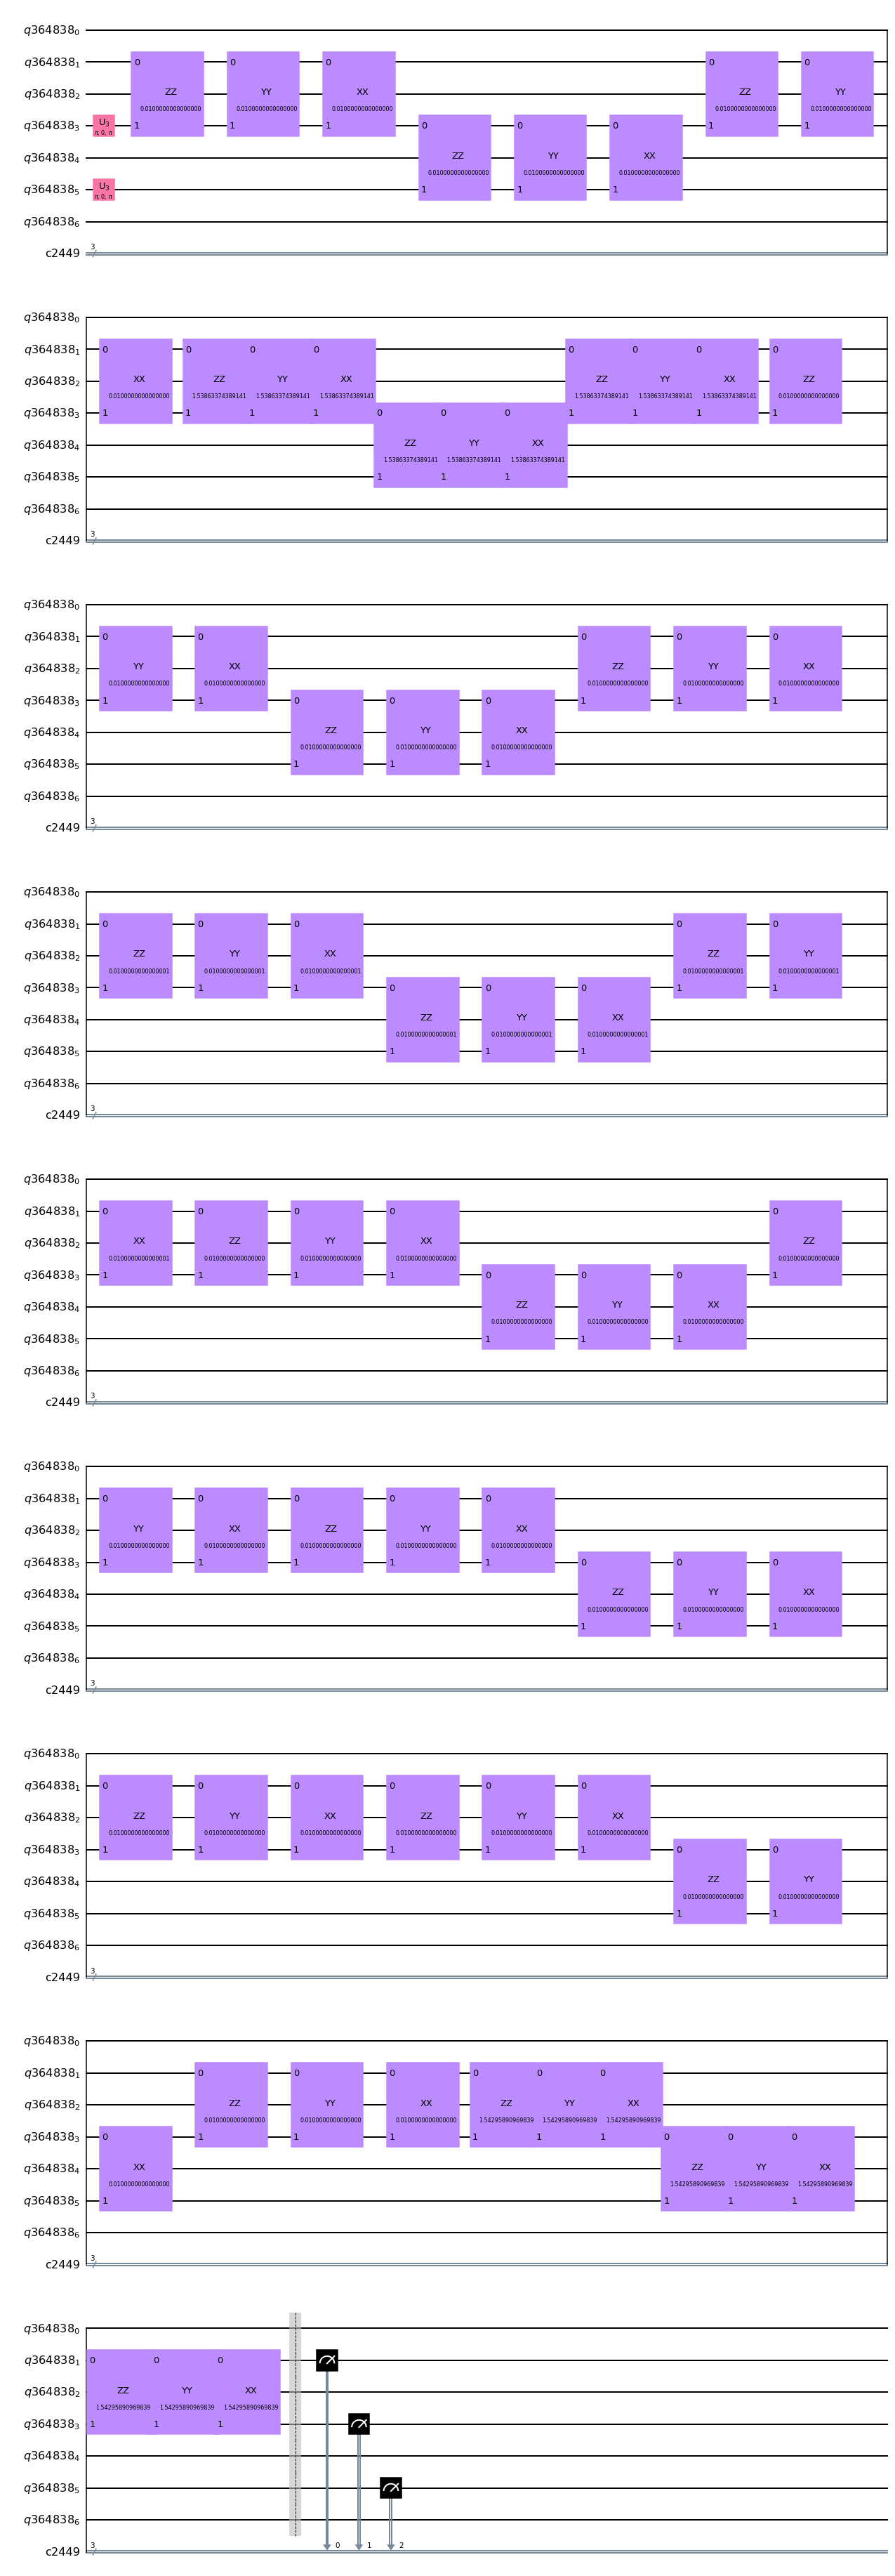

################################################################################

1/8 - Job ID 8436aafe-27a9-4600-ba33-ca8489df9aad
2/8 - Job ID 6dacc9c7-de9b-4b59-ba74-05139584d270
3/8 - Job ID 6eebee20-f047-4fbd-b866-23e4bf21e20b
4/8 - Job ID 0df043e3-811f-4f37-8754-66164a5be7bf
5/8 - Job ID d9ec48e2-b1c5-4b49-beb9-a44dd5b09777
6/8 - Job ID 4a4c7224-55f6-4847-856e-b888a5124ce0
7/8 - Job ID 6d4b6237-7d8f-4866-b619-404033b2310c
8/8 - Job ID 4566bba9-1e35-4123-8bcd-d923bdc58636

################################################################################

Final results - order: 2 - strotter steps: 8

State tomography fidelity = 0.2382 ± 0.0017

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:01:10



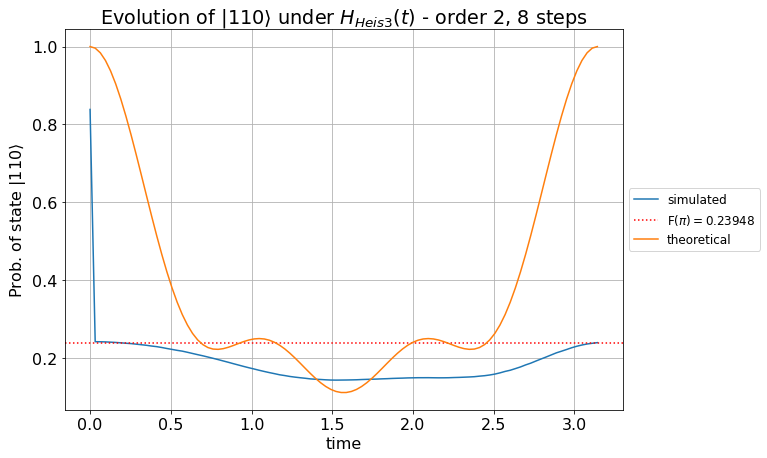

In [9]:
order = 2
uniform_times = False
backend_opt, backend_state_tomo = sim_noisy_jakarta, sim_noisy_jakarta
quadratic_loss = False

steps = range(4, 9)
min_times = [0.1, 0.01]

combs = itertools.product(steps, min_times)

for trotter_steps, params_bounds_min in combs:
    
    print("\n\n")    
    print("#"*80)
    print("="*80)
    print("#"*80)
    print(f"Order: {order}".center(80))
    print(f"# steps: {trotter_steps}".center(80))
    print(f"min time: {params_bounds_min}".center(80))
    print("#"*80)
    print("="*80)
    print("#"*80)
    print("\n\n")
    
    fids, fidelity_pi, best_params = optimize_params_and_run(order, trotter_steps, uniform_times, params_bounds_min,
                                                             backend_opt, backend_state_tomo, quadratic_loss)
    
    results['order'].append(order)
    results['n_steps'].append(trotter_steps)
    results['t_min'].append(params_bounds_min)
    results['fid_pi'].append(fidelity_pi)
    results['state_tomo_fids'].append(fids)
    results['best_params'].append(best_params)

In [10]:
results_second_order = pd.DataFrame(results).sort_values("fid_pi", ascending=False)

results_second_order

order  n_steps  t_min                                    state_tomo_fids  \
1      2        4   0.01  [0.3183407906217593, 0.3126486332453221, 0.315...   
0      2        4   0.10  [0.31283705796516276, 0.31003357335885773, 0.3...   
3      2        5   0.01  [0.28360721952824874, 0.2867924251324764, 0.28...   
2      2        5   0.10  [0.2637882314589019, 0.264216308142939, 0.2699...   
5      2        6   0.01  [0.2613166616864231, 0.2593277244816301, 0.261...   
7      2        7   0.01  [0.2510207003952444, 0.24552705781399717, 0.24...   
9      2        8   0.01  [0.23600403383642407, 0.2389898509054945, 0.24...   
4      2        6   0.10  [0.23088987809223746, 0.23756393482605453, 0.2...   
6      2        7   0.10  [0.16231938359557171, 0.1624729999557418, 0.16...   
8      2        8   0.10  [0.14286960663151693, 0.1407918817959506, 0.13...   

    fid_pi                                        best_params  
1  0.31477  [0.010000000000000007, 1.5603501684830143, 1.5...  
0  0.30885  [0.1, 0.09999999999999998, 2.841592653589761, ...  
3   0.2836  [0.01, 1.5568394912057102, 1.5547531623840827,...  
2  0.26746  [0.10000000000000057, 0.10000000000000041, 2.7...  
5  0.26247  [0.010000000000000002, 1.5520404423234293, 1.5...  
7  0.24871  [0.01, 1.5483040923247497, 1.543288561265044, ...  
9  0.23948  [0.010000000000000009, 1.538633743891405, 0.01...  
4  0.23264  [0.1, 2.6415926535897927, 0.1, 0.1, 0.10000000...  
6  0.16424  [0.23730353874294952, 0.28620352633632423, 1.0...  
8  0.14381  [0.10000000000000002, 1.0726557802748815, 0.43...